###  Subject : Big Data and Data Mining Project

###  Topic : Analysis and Prediction of Road Traffic Accidents in UK using 2019 Data


###   Project Background Information:
######  In the United Kingdom, all road traffic accidents (fatal and non-fatal) are recorded and reported. Every year, the  government publishes a vast amount of data related to these reports. We will use data from 2019 in this project because  it provides a fairly full sample with a lot of spectral information accessible.


#### Business Understanding and Analysis

###### At the very least, we will attempt to answer the following questions in order to better guide us through the analysis and to allow us to explore the subject in greater length and detail:

1.	Are there significant hours of the day, and days of the week, on which accidents occur?
2.	For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?
3.	For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?
4.	What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?
5.	What impact, if any, does sunrise and sunset times have on road traffic accidents?
6.	Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?
7.	Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?
8.	How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?
9.	Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models? 


#### Data Undertstanding and Analysis:
We will import the libraries and packages we will need for our project in this part. After that, we will import our datasets and begin processing and analysing the data:

In [1]:
# Import libraries necessary for this project

# Pandas, and NumPy: 
import numpy as np
import pandas as pd
from time import time
import math
import seaborn as sns
# Plotly: 
from chart_studio import plotly
import chart_studio.plotly as py
import plotly
import plotly.graph_objs as go
from plotly import tools
import csv
import folium
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# sklearn: 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# folium: 
from folium import plugins
from folium.plugins import HeatMap

# dython: 
from dython.nominal import associations

import colorlover as cl
from IPython.display import HTML
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline

##### Data loading and preprocessing:
To start the analysis we will load the data which consists of files below:
•	Accident Datasets
•	Vehicle Datasets
•	Casualty Datasets
•	Adjustments Datasets
•	Variable Lookup Dataset


In [6]:
#load the data as csv
accidents = pd.read_csv('Road Safety Data - Accidents 2019.csv',low_memory=False)
casualties = pd.read_csv('Road Safety Data - Casualties 2019.csv',low_memory=False)
vehicles = pd.read_csv('Road Safety Data- Vehicles 2019.csv',low_memory=False)
var_lookup = pd.read_excel('variable lookup.xls')
cas_adjust = pd.read_csv('cas_adjustment_lookup_2019.csv',low_memory=False)

In [7]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [8]:
accidents.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


###  Accidents 
The data comprises of numerous factors portraying an accident, it very well may be summed up into these fundamental attributes (location, condition of accidents, date, Roadtype,speedlimit,junction details and control and affected vehicles and casualties). As far as we can tell, all characteristics are coded as numbers, thus in order to get the most out of the data, we'll map it to the lookup tables supplied.

In [9]:
accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,117508.0,452403.224717,95033.024831,64084.000000,388018.250000,459396.000000,529373.250000,6.552440e+05
Location_Northing_OSGR,117508.0,278685.736426,150935.576227,10814.000000,175526.000000,218465.000000,384804.000000,1.167366e+06
Longitude,117508.0,-1.249439,1.392356,-7.525273,-2.180604,-1.123331,-0.135499,1.757476e+00
Latitude,117508.0,52.395427,1.359522,49.917760,51.465934,51.852523,53.357497,6.038864e+01
Police_Force,117536.0,28.228160,24.622519,1.000000,5.000000,23.000000,45.000000,9.800000e+01
Accident_Severity,117536.0,2.772512,0.451610,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,117536.0,1.840976,0.708412,1.000000,1.000000,2.000000,2.000000,1.700000e+01
Number_of_Casualties,117536.0,1.303073,0.754369,1.000000,1.000000,1.000000,1.000000,5.200000e+01
Day_of_Week,117536.0,4.111149,1.920117,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),117536.0,326.686522,256.494631,1.000000,84.000000,305.000000,514.000000,9.410000e+02


In [10]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

### Vehicles Data:

The data is made up of several factors that describe a vehicle that was involved in an accident; an accident can be related to multiple vehicles. These primary characteristics may be extracted from the data (driver data,Junction ,journey purpose, condition and features of vehicle). Similar to Accident Data, all characteristics are coded as numbers, and to get the most out of the data, we will map it to the available lookup tables.

In [11]:
vehicles.describe()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
count,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,...,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000,216381.000000
mean,1.557618,9.706730,0.008591,11.994898,0.124345,2.072562,0.143367,0.259588,0.252397,0.345409,...,4.660053,1.486133,35.094745,5.850107,1378.949589,0.978029,5.597275,3.922322,0.832069,3.922322
std,0.740160,9.701081,0.343620,6.830942,1.198804,2.984719,0.857616,1.630934,1.305908,1.855046,...,1.954003,0.682759,21.002679,3.196823,1593.463569,1.556321,6.202585,3.490764,1.108186,3.490764
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,9.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,23.000000,5.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,1.000000,35.000000,6.000000,1390.000000,1.000000,4.000000,4.000000,1.000000,4.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,2.000000,50.000000,8.000000,1910.000000,2.000000,10.000000,7.000000,1.000000,7.000000
max,21.000000,98.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,6.000000,3.000000,102.000000,11.000000,29980.000000,12.000000,94.000000,10.000000,3.000000,10.000000


In [12]:
casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

### Casualties Data: 

The data is made up of numerous variables that describe the casualties involved in an accident; an accident might have many casualties. These primary characteristics may be extracted from the data ( condition of casualtie, data related to spesific casuality groub,casuality data,pedestrain). Similar to Accident Data, all characteristics are coded as numbers, and to get the most out of the data, we will map it to the available lookup tables.

In [13]:
casualties.describe().T

,count,mean,std,min,25%,50%,75%,max
Vehicle_Reference,153158.0,1.464840,0.608019,1.0,1.0,1.0,2.0,20.0
Casualty_Reference,153158.0,1.393933,2.820059,1.0,1.0,1.0,1.0,991.0
Casualty_Class,153158.0,1.493856,0.730922,1.0,1.0,1.0,2.0,3.0
Sex_of_Casualty,153158.0,1.389754,0.516297,-1.0,1.0,1.0,2.0,2.0
Age_of_Casualty,153158.0,36.932612,19.686892,-1.0,22.0,34.0,50.0,102.0
Age_Band_of_Casualty,153158.0,6.322347,2.468329,-1.0,5.0,6.0,8.0,11.0
Casualty_Severity,153158.0,2.807721,0.422122,1.0,3.0,3.0,3.0,3.0
Pedestrian_Location,153158.0,0.760711,2.121485,-1.0,0.0,0.0,0.0,10.0
Pedestrian_Movement,153158.0,0.599929,1.919874,0.0,0.0,0.0,0.0,9.0
Car_Passenger,153158.0,0.239321,0.568378,-1.0,0.0,0.0,0.0,2.0


In [14]:
cas_adjust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314737 entries, 0 to 3314736
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   accident_index      object 
 1   Vehicle_Reference   int64  
 2   Casualty_Reference  int64  
 3   Adjusted_Serious    float64
 4   Adjusted_Slight     float64
 5   Injury_Based        int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 151.7+ MB


##  Data Cleaning

### Handling Missing Value

In [15]:
#Number of nulls by each columns
accidents.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [16]:
print('Percentage of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')
print('Percentage of Missing Values in Casualtie Table:', 
      round(casualties.isna().sum().sum()/len(accidents),3), '%')
print('Percentage of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Percentage of Missing Values in Accidents Table: 0.05 %
Percentage of Missing Values in Casualtie Table: 0.0 %
Percentage of Missing Values in Vehicles Table: 0.0 %


In [17]:
#Identifying missing information outwardly utilizing Missingno library
import missingno as msno

<AxesSubplot:>

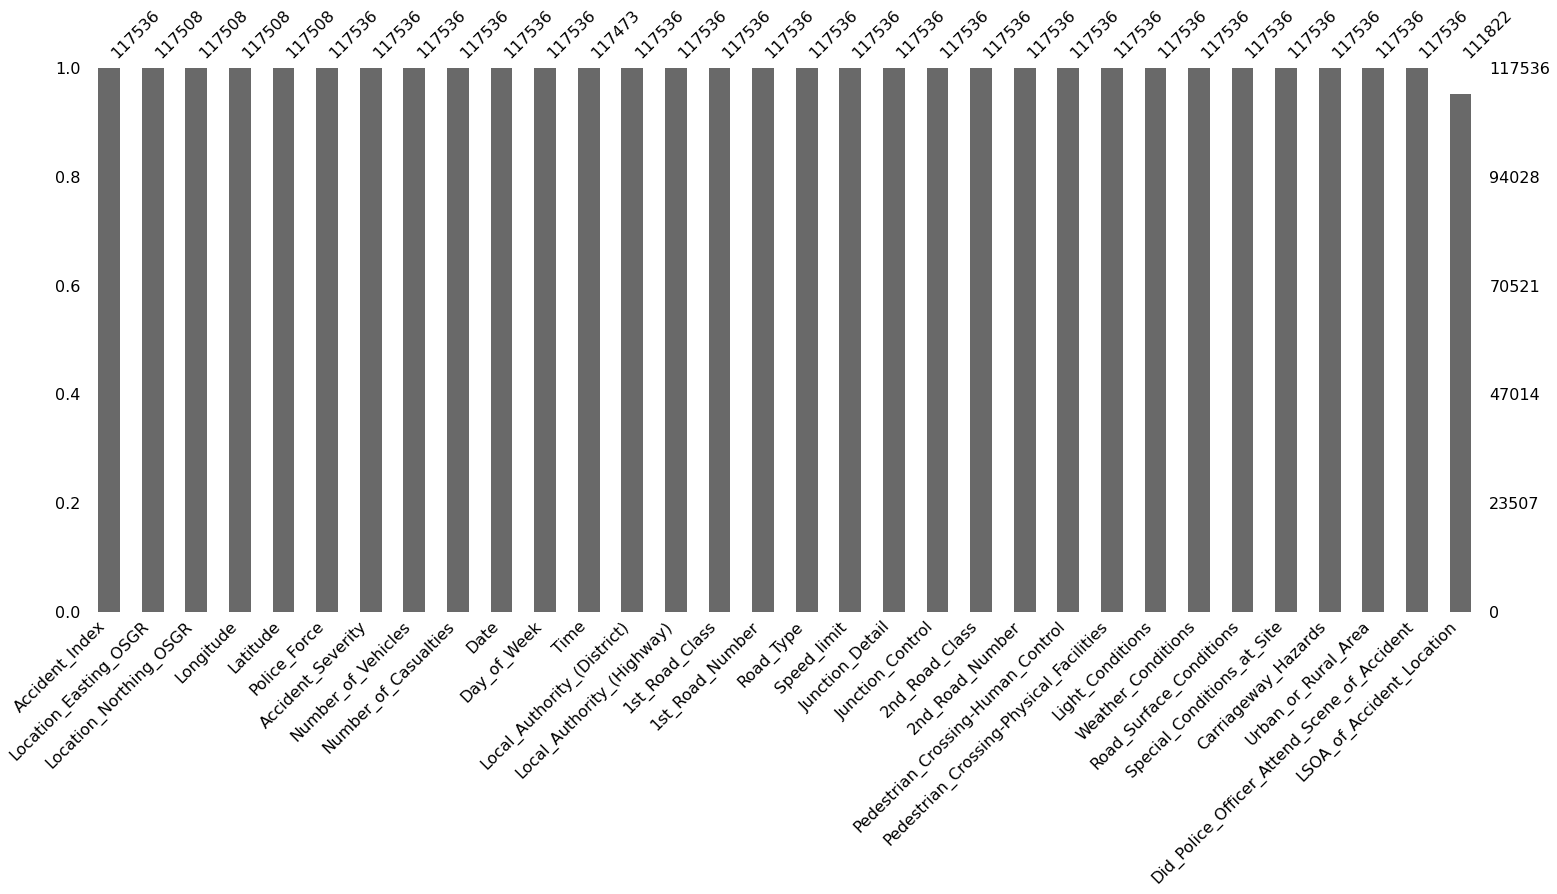

In [18]:
msno.bar(accidents)

<AxesSubplot:>

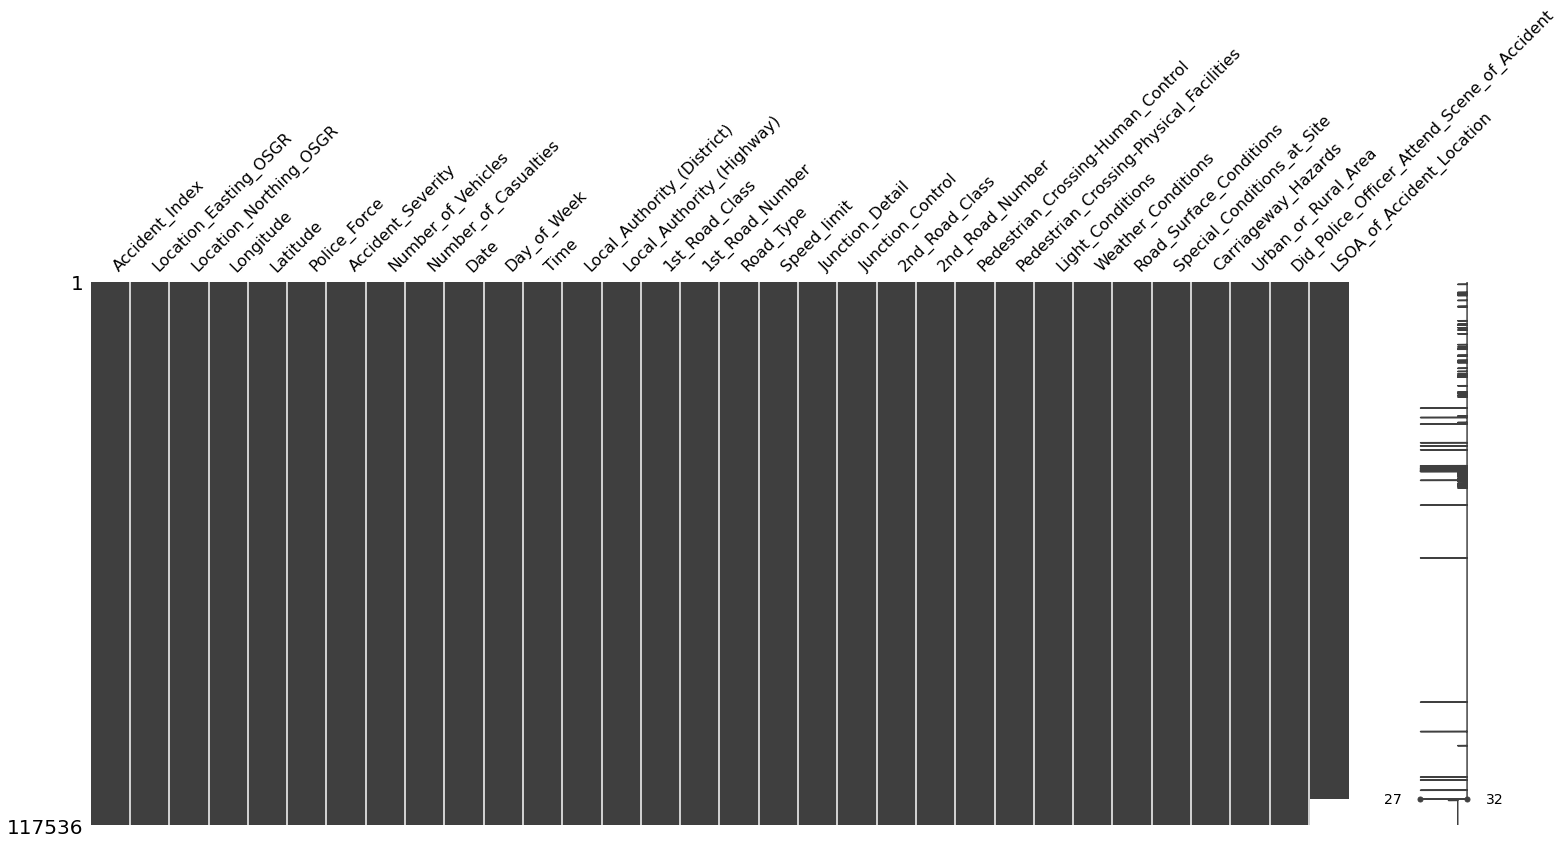

In [19]:
msno.matrix(accidents)
#Showing the areas of the missing information
#The msno.matrix nullity framework is an information thick presentation which lets you rapidly see patterns in the dataset

In [20]:
#check corr b/t Location_Easting_OSGR & Location_Northing_OSGR AND Longitude and Latitude

print(accidents['Location_Easting_OSGR'].corr(accidents['Longitude']))
print(accidents['Location_Northing_OSGR'].corr(accidents['Latitude']))

0.9994219376361236
0.9999700108545106


This shows that Location_Easting_OSGR and Longitude contains the same information so is Location_Northing_OSGR and Latitude
so we apply the same method of handing missing value in Location_Easting_OSGR & Location_Northing_OSGR and Latitude and Longitude 

In [21]:
# Drop Because of the small size of the missing value in latitude,longitude and Time
accidents = accidents.dropna( how='any',
                    subset=['Location_Northing_OSGR', 'Location_Easting_OSGR','Longitude','Latitude', 'Time','LSOA_of_Accident_Location'])

In [22]:
accidents = accidents.replace(np.nan, -1)

In [23]:
# check if we have no NaN's anymore
accidents.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

### Further Data cleaning , handling -1

In [24]:
# checking for -1 in the Dataset
for i in accidents.columns:
    sum = len(accidents[accidents[i]== -1])
    #print('Number of -1 in' + i,sum )
    percentage = round(sum/len(accidents)*100,3)
    print('Number of -1 in'," " + i,'is',  sum ,'Percentage of -1 is' ,percentage)
    print('------------------------')

Number of -1 in  Accident_Index is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Location_Easting_OSGR is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Location_Northing_OSGR is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Longitude is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Latitude is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Police_Force is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Accident_Severity is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Number_of_Vehicles is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Number_of_Casualties is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Date is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Day_of_Week is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Time is 0 Percentage of -1 is 0.0
-

For all features, (-1) represent a missing data point, to better handle it with pandas, it will be replaced to NaN: 
We will need to drop variables that mostly contain missing values: Junction_Control and 2nd_Road_Class
Other variables contains missing values less than 4%. 
For variables that contain only a few missing values, we can either drop those records or replace them. Typically, we would substitute most numeric nulls with mean/median/mode. However, given the low volume of nulls and our need to make accurate recommendations to the UK government with as little assumptions as possible, we can safely drop some records that do not have much effect on our analysis.Speed_limit,Junction_Detail,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Special_Conditions_at_Site,Special_Conditions_at_Site,Carriageway_Hazards have -1 less that 2%

###   Correcting Missing values indicated with -1

In [25]:
accidents['Speed_limit'].unique()

array([30, 20, 40, 50, 70, -1, 60], dtype=int64)

In [26]:
#Location_Easting_OSGR(-1 is replaced with the mode being 30)
accidents.Location_Easting_OSGR = accidents.Location_Easting_OSGR.replace([-1],['30']) 
accidents.Location_Easting_OSGR.value_counts

<bound method IndexOpsMixin.value_counts of 0         528218.0
1         530219.0
2         530222.0
3         525531.0
4         524920.0
            ...   
111847    326180.0
111848    309990.0
111849    297250.0
111850    286940.0
111851    293850.0
Name: Location_Easting_OSGR, Length: 111760, dtype: float64>

In [27]:
# Junction_Detail
# Rather than dropping added missing data(-1) to the mode (Not at junction or within 20 meters)
accidents.Junction_Detail = accidents.Junction_Detail.replace([-1],['0']) 
accidents.Junction_Detail.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         0
2         3
3         3
4         6
         ..
111847    0
111848    0
111849    0
111850    0
111851    0
Name: Junction_Detail, Length: 111760, dtype: object>

In [28]:
accidents.mode()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,533465.0,180819.0,-2.715409,51.450232,1.0,3.0,2.0,1.0,04/12/2019,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,E01032739
1,2019010152270,NaN,180992.0,-1.909639,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019010155191,NaN,181092.0,-1.594158,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019010155192,NaN,182780.0,-1.524603,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019010155194,NaN,NaN,-1.475040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111755,201963DF02919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111756,201963DF03019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111757,201963DF03319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111758,201963DF03419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
accidents.isna().sum()/len(accidents)

Accident_Index                                 0.0
Location_Easting_OSGR                          0.0
Location_Northing_OSGR                         0.0
Longitude                                      0.0
Latitude                                       0.0
Police_Force                                   0.0
Accident_Severity                              0.0
Number_of_Vehicles                             0.0
Number_of_Casualties                           0.0
Date                                           0.0
Day_of_Week                                    0.0
Time                                           0.0
Local_Authority_(District)                     0.0
Local_Authority_(Highway)                      0.0
1st_Road_Class                                 0.0
1st_Road_Number                                0.0
Road_Type                                      0.0
Speed_limit                                    0.0
Junction_Detail                                0.0
Junction_Control               

In [30]:
#Road_Type
# Rather than dropping added unknown(9) and missing data(-1) to the mode ('Single carriageway')
accidents.Road_Type = accidents.Road_Type.replace([-1],[6])  
accidents.Road_Type.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         2
2         6
3         6
4         6
         ..
111847    6
111848    6
111849    6
111850    6
111851    6
Name: Road_Type, Length: 111760, dtype: int64>

A lot of the data uses numerical labeling, so majority of the cleaning will be checking these datatypes and assinging the correct labels according to the data dictionary.

In [31]:
accidents.Accident_Severity.value_counts

<bound method IndexOpsMixin.value_counts of 0         3
1         3
2         3
3         2
4         3
         ..
111847    1
111848    1
111849    1
111850    1
111851    1
Name: Accident_Severity, Length: 111760, dtype: int64>

In [32]:
accidents['1st_Road_Class'].value_counts

<bound method IndexOpsMixin.value_counts of 0         3
1         3
2         4
3         4
4         3
         ..
111847    3
111848    3
111849    4
111850    3
111851    3
Name: 1st_Road_Class, Length: 111760, dtype: int64>

In [33]:
#Road_Type
# Rather than dropping added unknown(9) and missing data(-1) to the mode ('Single carriageway')
accidents.Road_Type = accidents.Road_Type.replace([-1],[6])  
accidents.Road_Type.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         2
2         6
3         6
4         6
         ..
111847    6
111848    6
111849    6
111850    6
111851    6
Name: Road_Type, Length: 111760, dtype: int64>

In [34]:
accidents.Junction_Detail.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         0
2         3
3         3
4         6
         ..
111847    0
111848    0
111849    0
111850    0
111851    0
Name: Junction_Detail, Length: 111760, dtype: object>

In [35]:
# Rather than dropping added missing data(-1) to the mode (Not at junction or within 20 meters)
accidents.Junction_Detail = accidents.Junction_Detail.replace([-1],[0])
accidents.Junction_Detail.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         0
2         3
3         3
4         6
         ..
111847    0
111848    0
111849    0
111850    0
111851    0
Name: Junction_Detail, Length: 111760, dtype: object>

In [36]:
accidents.Light_Conditions.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         4
2         4
3         4
4         4
         ..
111847    1
111848    1
111849    4
111850    1
111851    1
Name: Light_Conditions, Length: 111760, dtype: int64>

In [37]:
# Add missing data(-1) to mode (Daylight)
accidents.Light_Conditions = accidents.Light_Conditions.replace([-1],[1])

accidents.Light_Conditions.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         4
2         4
3         4
4         4
         ..
111847    1
111848    1
111849    4
111850    1
111851    1
Name: Light_Conditions, Length: 111760, dtype: int64>

In [38]:
accidents.Weather_Conditions.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
111847    1
111848    1
111849    2
111850    1
111851    1
Name: Weather_Conditions, Length: 111760, dtype: int64>

In [39]:
# Add unknown(9) and missing data(-1) to mode (Fine no high winds)
accidents.Weather_Conditions = accidents.Weather_Conditions.replace([-1],[1])
accidents.Weather_Conditions.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
111847    1
111848    1
111849    2
111850    1
111851    1
Name: Weather_Conditions, Length: 111760, dtype: int64>

In [40]:
accidents.Road_Surface_Conditions.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
111847    1
111848    1
111849    2
111850    1
111851    1
Name: Road_Surface_Conditions, Length: 111760, dtype: int64>

In [41]:
# Add missing data(-1) to mode (Dry)
accidents.Road_Surface_Conditions = accidents.Road_Surface_Conditions.replace([-1],[1])
accidents.Road_Surface_Conditions.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
111847    1
111848    1
111849    2
111850    1
111851    1
Name: Road_Surface_Conditions, Length: 111760, dtype: int64>

In [42]:
accidents.Special_Conditions_at_Site.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
111847    0
111848    0
111849    0
111850    0
111851    0
Name: Special_Conditions_at_Site, Length: 111760, dtype: int64>

In [43]:
# Add missing data (-1) to mode (None)
accidents.Special_Conditions_at_Site = \
accidents.Special_Conditions_at_Site.replace([-1],[0])

accidents.Special_Conditions_at_Site.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
111847    0
111848    0
111849    0
111850    0
111851    0
Name: Special_Conditions_at_Site, Length: 111760, dtype: int64>

In [44]:
accidents.Carriageway_Hazards.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
111847    0
111848    0
111849    0
111850    0
111851    0
Name: Carriageway_Hazards, Length: 111760, dtype: int64>

In [45]:
# Add missing data(-1) to mode (None)
accidents.Carriageway_Hazards = \
accidents.Carriageway_Hazards.replace([-1],[0])

accidents.Carriageway_Hazards.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
111847    0
111848    0
111849    0
111850    0
111851    0
Name: Carriageway_Hazards, Length: 111760, dtype: int64>

In [46]:
accidents.Urban_or_Rural_Area.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
111847    2
111848    2
111849    2
111850    2
111851    2
Name: Urban_or_Rural_Area, Length: 111760, dtype: int64>

In [47]:
# Add unallocated (1) to mode (Urban)
accidents.Urban_or_Rural_Area = accidents.Urban_or_Rural_Area.replace([-1],[1])
accidents.Urban_or_Rural_Area.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         1
2         1
3         1
4         1
         ..
111847    2
111848    2
111849    2
111850    2
111851    2
Name: Urban_or_Rural_Area, Length: 111760, dtype: int64>

In [48]:
# Also are from features that wouldn't make sense to impute with another value because of the percentages
accidents.drop(accidents[accidents['Pedestrian_Crossing-Human_Control'] == -1].index, inplace = True)
accidents.drop(accidents[accidents['Pedestrian_Crossing-Physical_Facilities'] == -1].index, inplace = True)
accidents.drop(accidents[accidents['2nd_Road_Number'] == -1].index, inplace = True)
accidents.drop(accidents[accidents['2nd_Road_Class'] == -1].index, inplace = True)

In [49]:
df_clean = accidents

In [50]:
df_clean.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546
6,2019010155196,532424.0,164886.0,-0.099071,51.367605,1,3,1,1,01/01/2019,...,0,5,4,1,1,0,0,1,1,E01001043


##  Cleaning Casualty Dataset

In [51]:
# checking for -1 in the Dataset
for i in casualties.columns:
    sum = len(casualties[casualties[i]== -1])
    #print('Number of -1 in' + i,sum )
    percentage = round(sum/len(casualties)*100,3)
    print('Number of -1 in'," " + i,'is',  sum ,'Percentage of -1 is' ,percentage)
    print('------------------------')

Number of -1 in  Accident_Index is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Vehicle_Reference is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Casualty_Reference is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Casualty_Class is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Sex_of_Casualty is 733 Percentage of -1 is 0.479
------------------------
Number of -1 in  Age_of_Casualty is 3255 Percentage of -1 is 2.125
------------------------
Number of -1 in  Age_Band_of_Casualty is 3255 Percentage of -1 is 2.125
------------------------
Number of -1 in  Casualty_Severity is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Pedestrian_Location is 1 Percentage of -1 is 0.001
------------------------
Number of -1 in  Pedestrian_Movement is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Car_Passenger is 589 Percentage of -1 is 0.385
------------------------
Number 

In [52]:
casualties.mode()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019500885809,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2


In [53]:
# Change Sex_of_Casualty to proper labels
# Add missing data(-1) to mode (Male)
casualties.Sex_of_Casualty = casualties.Sex_of_Casualty.replace([-1],[1]) 
casualties.Sex_of_Casualty.value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         2
2         2
3         2
4         2
         ..
153153    1
153154    1
153155    1
153156    1
153157    1
Name: Sex_of_Casualty, Length: 153158, dtype: int64>

In [54]:
casualties.Age_of_Casualty.value_counts

<bound method IndexOpsMixin.value_counts of 0         58
1         -1
2         -1
3         24
4         21
          ..
153153    24
153154    22
153155    61
153156    54
153157    55
Name: Age_of_Casualty, Length: 153158, dtype: int64>

In [55]:
casualties.Age_of_Casualty = casualties.Age_of_Casualty.replace([-1],[30]) 
casualties.Age_of_Casualty.value_counts

<bound method IndexOpsMixin.value_counts of 0         58
1         30
2         30
3         24
4         21
          ..
153153    24
153154    22
153155    61
153156    54
153157    55
Name: Age_of_Casualty, Length: 153158, dtype: int64>

In [56]:
casualties.Age_Band_of_Casualty = casualties.Age_Band_of_Casualty.replace([-1],[6]) 
casualties.Age_Band_of_Casualty.value_counts

<bound method IndexOpsMixin.value_counts of 0         9
1         6
2         6
3         5
4         5
         ..
153153    5
153154    5
153155    9
153156    8
153157    8
Name: Age_Band_of_Casualty, Length: 153158, dtype: int64>

In [57]:
# Pedestrian_Location
casualties.Pedestrian_Location = casualties.Pedestrian_Location.replace([-1],[0]) 
casualties.Pedestrian_Location.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
153153    0
153154    0
153155    0
153156    5
153157    0
Name: Pedestrian_Location, Length: 153158, dtype: int64>

In [58]:
# Car_Passenger
casualties.Car_Passenger = casualties.Car_Passenger.replace([-1],[0]) 
casualties.Car_Passenger.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         1
2         2
3         0
4         0
         ..
153153    0
153154    0
153155    0
153156    0
153157    0
Name: Car_Passenger, Length: 153158, dtype: int64>

In [59]:
#Bus_or_Coach_Passenger
casualties.Bus_or_Coach_Passenger = casualties.Bus_or_Coach_Passenger.replace([-1],[0]) 
casualties.Bus_or_Coach_Passenger.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
153153    0
153154    0
153155    0
153156    0
153157    0
Name: Bus_or_Coach_Passenger, Length: 153158, dtype: int64>

In [60]:
#Pedestrian_Road_Maintenance_Worker
casualties.Pedestrian_Road_Maintenance_Worker = casualties.Pedestrian_Road_Maintenance_Worker.replace([-1],[0]) 
casualties.Pedestrian_Road_Maintenance_Worker.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
153153    0
153154    0
153155    0
153156    0
153157    0
Name: Pedestrian_Road_Maintenance_Worker, Length: 153158, dtype: int64>

In [61]:
#Casualty_Type
casualties.Casualty_Type = casualties.Casualty_Type.replace([-1],[9]) 
casualties.Casualty_Type.value_counts

<bound method IndexOpsMixin.value_counts of 0          9
1          9
2          9
3          9
4          1
          ..
153153    19
153154    19
153155     9
153156     0
153157     5
Name: Casualty_Type, Length: 153158, dtype: int64>

In [62]:
#For Casualty_Home_Area_Type and Casualty_IMD_Decile have more than 10% missing values. we will drop the row with -1 as replacing with the mode may affect our analysis
casualties.drop(casualties[casualties['Casualty_Home_Area_Type'] == -1].index, inplace = True)
casualties.drop(casualties[casualties['Casualty_IMD_Decile'] == -1].index, inplace = True)

In [63]:
casualties['Sex_of_Casualty'].unique()

array([1, 2], dtype=int64)

In [64]:
casualties['Pedestrian_Location'].unique()

array([ 0,  5,  1, 10,  9,  6,  4,  8,  3,  2,  7], dtype=int64)

##  Cleaning Vehicle Dataset

In [65]:
# checking for -1 in the Dataset
for i in vehicles.columns:
    sum = len(vehicles[vehicles[i]== -1])
    #print('Number of -1 in' + i,sum )
    percentage = round(sum/len(vehicles)*100,3)
    print('Number of -1 in'," " + i,'is',  sum ,'Percentage of -1 is' ,percentage)
    print('------------------------')

Number of -1 in  Accident_Index is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Vehicle_Reference is 0 Percentage of -1 is 0.0
------------------------
Number of -1 in  Vehicle_Type is 309 Percentage of -1 is 0.143
------------------------
Number of -1 in  Towing_and_Articulation is 4527 Percentage of -1 is 2.092
------------------------
Number of -1 in  Vehicle_Manoeuvre is 13063 Percentage of -1 is 6.037
------------------------
Number of -1 in  Vehicle_Location-Restricted_Lane is 12746 Percentage of -1 is 5.891
------------------------
Number of -1 in  Junction_Location is 9531 Percentage of -1 is 4.405
------------------------
Number of -1 in  Skidding_and_Overturning is 13361 Percentage of -1 is 6.175
------------------------
Number of -1 in  Hit_Object_in_Carriageway is 13057 Percentage of -1 is 6.034
------------------------
Number of -1 in  Vehicle_Leaving_Carriageway is 12916 Percentage of -1 is 5.969
------------------------
Number of -1 in  Hit_Object_

In [66]:
vehicles.mode()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2.01901E+12,1,9,0,18,0,0,0,0,0,...,6,1,-1,6,-1,1,-1,-1,1,-1


In [67]:
#Towing_and_Articulation
#Add missing data(-1) to mode (No tow/articulation)
vehicles.Towing_and_Articulation = vehicles.Towing_and_Articulation.replace([-1],[0]) 
vehicles.Towing_and_Articulation.value_counts

<bound method IndexOpsMixin.value_counts of 0         0
1         0
2         0
3         0
4         0
         ..
216376    0
216377    0
216378    0
216379    0
216380    0
Name: Towing_and_Articulation, Length: 216381, dtype: int64>

In [68]:
#Journey_Purpose_of_Driver
#Add missing data(-1) to mode (Not known)
vehicles.Journey_Purpose_of_Driver = vehicles.Journey_Purpose_of_Driver.replace([-1],[6]) 
vehicles.Journey_Purpose_of_Driver.value_counts

<bound method IndexOpsMixin.value_counts of 0         6
1         6
2         6
3         6
4         6
         ..
216376    1
216377    6
216378    6
216379    5
216380    6
Name: Journey_Purpose_of_Driver, Length: 216381, dtype: int64>

In [69]:
#For some reasons, the percentage of missing data in the vehicle dataset
#seems to high for imputation as replacement would affect our anaysis
#Using drop() to delete rows based on column value
# Removing data missing or out of range
vehicles.drop(vehicles[vehicles['Vehicle_Manoeuvre'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Vehicle_Location-Restricted_Lane'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Junction_Location'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Skidding_and_Overturning'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Hit_Object_in_Carriageway'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Vehicle_Leaving_Carriageway'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Hit_Object_off_Carriageway'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Was_Vehicle_Left_Hand_Drive?'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Age_of_Driver'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Age_Band_of_Driver'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Engine_Capacity_(CC)'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Propulsion_Code'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Age_of_Vehicle'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Driver_IMD_Decile'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Driver_Home_Area_Type'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['Vehicle_IMD_Decile'] == -1].index, inplace = True)
vehicles.drop(vehicles[vehicles['1st_Point_of_Impact'] == -1].index, inplace = True)

In [70]:
vehicles.mode()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2.01901E+12,1,9,0,18,0,0,0,0,0,...,6,1,30,6,1598,1,3,2,1,2


##  Treating Time and Date

In [71]:
#Obtaining the months from date colunm
accidents['Months'] = accidents['Date'].str[3:5]

In [72]:
#obtaining Hour from time
accidents['Hour']= accidents['Time'].str[0:2]

In [73]:
#converting day of the week to words from numbers by creating new colunms
weekday = [2,3,4,5,6]
weekend = [1,7]# weekend is Sunday and saturday
accidents['weekdays']= accidents['Day_of_Week'].map(lambda x: 'weekday' if x in weekday else 'weekend')

In [75]:
#Preprocessing
accidents['Latitude'] = accidents['Latitude'].astype(float)
accidents['Date']= accidents['Date'].astype('datetime64')
accidents['Longitude'] = accidents['Longitude'].astype(float)
heat_df = accidents[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])
#Generate Heatmap from  sample of 250k values
heat_data = heat_df.values
#m = folium.Map(location=[51.5074, 0.1278],width='100%', height="100%", zoom_start=7.5)
#m

In [76]:
#Heatmap
import folium
from folium.plugins import HeatMap
m = folium.Map(location=[54.251186, -4.463196],width=800,height=700, min_zoom=5, max_zoom=18, zoom_start=6, min_lat=48, max_lat=60, min_lon=-13, max_lon=4,
    control_scale=False,
    zoom_control=False)
HeatMap(heat_data,radius=9.5).add_to(m)
m

## A . Hour of the Day with Most Accidents

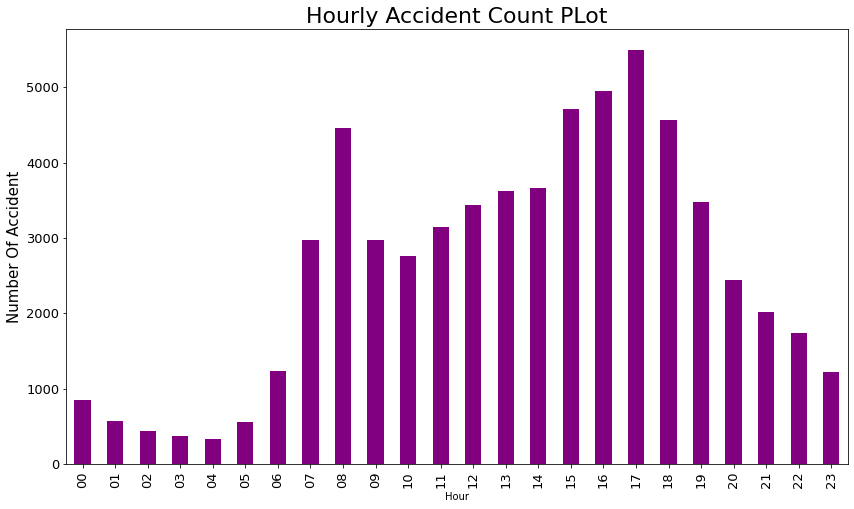

In [77]:
accidents_by_hour = accidents['Hour'].groupby(accidents['Hour']).count()
#accidents_hour = accidents['Hour'].groupby(accidents['Hour']).count()
ax = accidents_by_hour.plot(kind='bar',figsize=(14,8),color = 'purple',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Hourly Accident Count PLot', fontsize =22)
ax.set_ylabel('Number Of Accident',fontsize =15)
plt.show()

## Significant Days of the week with Most Accident

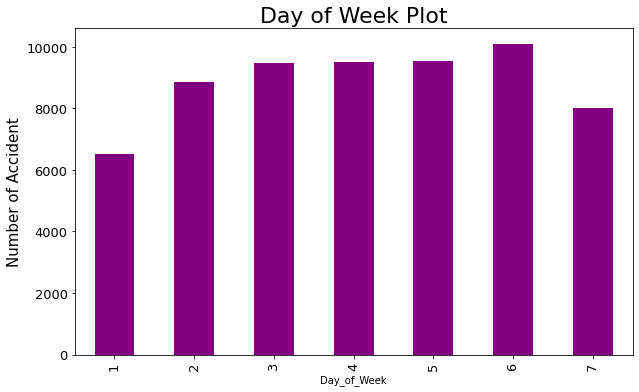

In [78]:
accidents_by_day_week = accidents['Day_of_Week'].groupby(accidents['Day_of_Week']).count()
ax= accidents_by_day_week.plot(kind= 'bar',figsize=(10,6),color = 'purple',fontsize=13);
ax.set_alpha(0.8)
ax.set_title('Day of Week Plot',fontsize= 22)
ax.set_ylabel('Number of Accident',fontsize = 15)
plt.show()

## Month of the year with most accident

In [439]:
accidents_by_months = accidents['Months'].value_counts()
accidents_by_months

11    5752
10    5544
07    5426
09    5305
06    5272
12    5231
05    5178
01    5036
03    4951
08    4938
02    4750
04    4615
Name: Months, dtype: int64

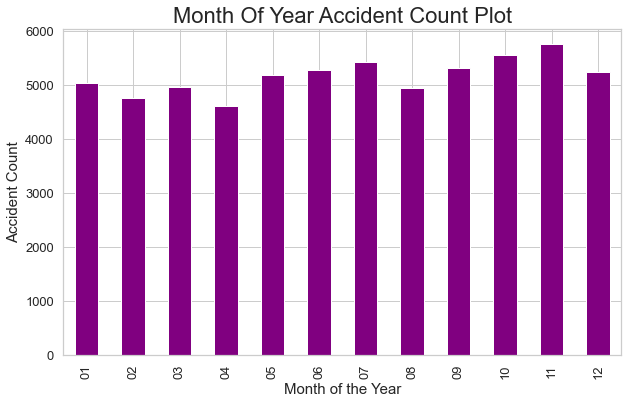

In [440]:
accidents_by_months = accidents['Months'].groupby(accidents['Months']).count()
ax = accidents_by_months.plot(kind ='bar', figsize = (10,6),color = 'purple', fontsize = 13);
ax.set_alpha(0.8)
ax.set_title('Month Of Year Accident Count Plot',fontsize = 22)
ax.set_ylabel('Accident Count', fontsize = 15)
ax.set_xlabel('Month of the Year', fontsize = 15)
plt.show()

## Accident in Weekday or Weekend

In [441]:
accidents_by_day_end = accidents['weekdays'].value_counts()
accidents_by_day_end

weekday    47460
weekend    14538
Name: weekdays, dtype: int64

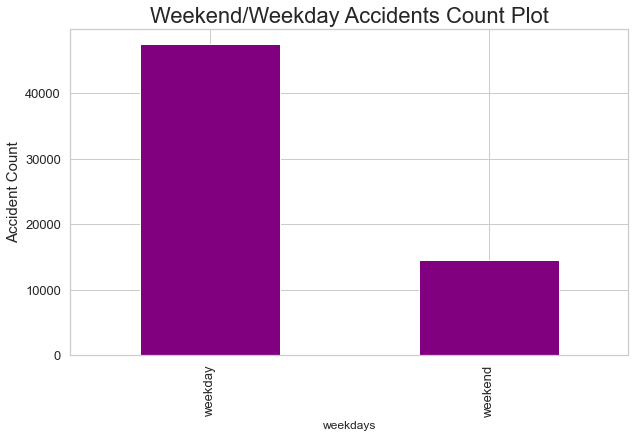

In [442]:
weekday_count = accidents['weekdays'].groupby(accidents['weekdays']).count()
ax = weekday_count.plot(kind ='bar', figsize = (10,6),color = 'purple', fontsize = 13);
ax.set_alpha(0.8)
ax.set_title('Weekend/Weekday Accidents Count Plot',fontsize = 22)
ax.set_ylabel('Accident Count', fontsize = 15)
plt.show()

In [443]:
accidents.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,61998.00000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,...,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000,61998.000000
mean,461208.71420,258081.646021,-1.114255,52.210956,23.068986,2.794074,1.869093,1.284654,4.114197,277.351447,...,543.171538,0.032517,1.215862,1.961902,1.578680,1.296042,0.068760,0.036614,1.229233,1.350269
std,85827.40807,118701.165172,1.242181,1.071542,19.802772,0.426510,0.605068,0.703768,1.904140,222.730595,...,1501.629812,0.244310,2.233820,1.593807,1.679392,0.509288,0.541693,0.381536,0.420343,0.601861
min,135706.00000,20568.000000,-5.695002,50.042087,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,400451.00000,175406.000000,-1.994833,51.465116,1.000000,3.000000,2.000000,1.000000,3.000000,32.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,469411.00000,201156.000000,-0.990093,51.695355,20.000000,3.000000,2.000000,1.000000,4.000000,273.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,529695.50000,356922.250000,-0.132310,53.106938,43.000000,3.000000,2.000000,1.000000,6.000000,477.000000,...,48.000000,0.000000,1.000000,4.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000
max,655244.00000,656369.000000,1.757476,55.800599,63.000000,3.000000,13.000000,25.000000,7.000000,753.000000,...,9899.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,3.000000


In [444]:
#File merging
accidents = pd.merge(accidents,vehicles, how = 'inner', on = 'Accident_Index')

In [445]:
accidents = pd.merge(accidents ,casualties , how = 'inner', on = 'Accident_Index')

## B Motorbikes Accidents, Significant hours of the day and days of the week on which accidents occurs

In [446]:
# Pedestrains are people running or walking
# Bicycles, shooter riders, skateboard or skates.
# or are using wheelchair, tricycles or quardricycles
# from the vehicles types this represents labels 1,2,3,4,5,22,23,97


In [447]:
motorbikes = accidents[accidents['Vehicle_Type'].isin([1,2,3,4,5,22,23,97])]

In [448]:
motorbikes['Hour'].value_counts()

17    795
16    675
18    592
15    527
19    494
13    461
08    459
14    441
12    439
07    399
11    348
20    323
21    298
10    278
09    267
22    220
06    171
23    132
00     66
05     51
01     45
02     27
04     26
03     13
Name: Hour, dtype: int64

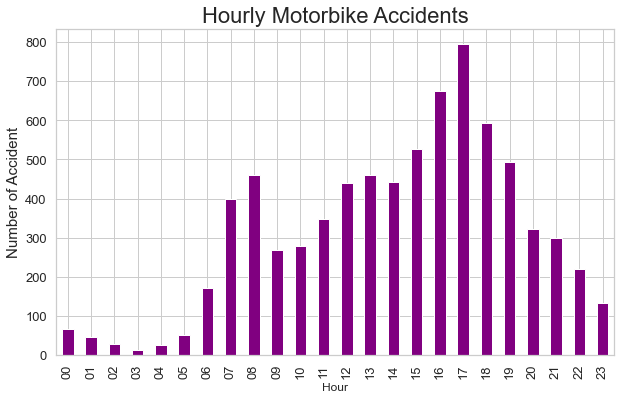

In [449]:
# Hour of the dy
motorbike_by_hour = motorbikes['Hour'].groupby(motorbikes['Hour']).count()
ax = motorbike_by_hour.plot(kind = 'bar', figsize = (10,6),color = 'purple',fontsize =13);
ax.set_alpha(0.8)
ax.set_title('Hourly Motorbike Accidents', fontsize= 22)
ax.set_ylabel('Number of Accident', fontsize = 15)
plt.show() 

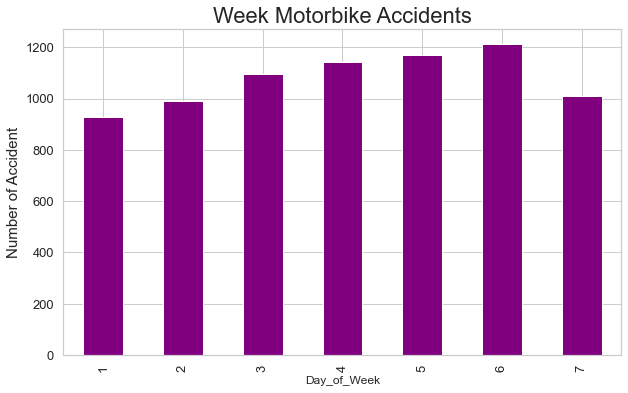

In [450]:
## Days of the week with motobikes 
motorbikes_accidents_by_week = motorbikes['Day_of_Week'].groupby(motorbikes['Day_of_Week']).count()
ax = motorbikes_accidents_by_week.plot(kind = 'bar', figsize = (10,6),color = 'purple',fontsize =13);
ax.set_alpha(0.8)
ax.set_title('Week Motorbike Accidents', fontsize= 22)
ax.set_ylabel('Number of Accident', fontsize = 15)
plt.show() 

## C. Pedestrains involved in accidents, are there significant hours of the day or days of the             week on which they are more likey to be invloved

In [451]:
accidents['Casualty_Class'].value_counts()

1    62487
2    19367
3     5678
Name: Casualty_Class, dtype: int64

In [452]:
pedestrian_accidents = accidents[accidents['Casualty_Class']==3]
len(pedestrian_accidents)

5678

In [453]:
pedestrian_accidents['Hour'].value_counts()

15    635
17    522
16    484
08    479
18    409
14    324
13    318
19    309
12    304
11    269
09    259
10    259
22    206
20    189
07    180
21    141
23    108
00     82
06     54
01     50
02     36
03     28
05     21
04     12
Name: Hour, dtype: int64

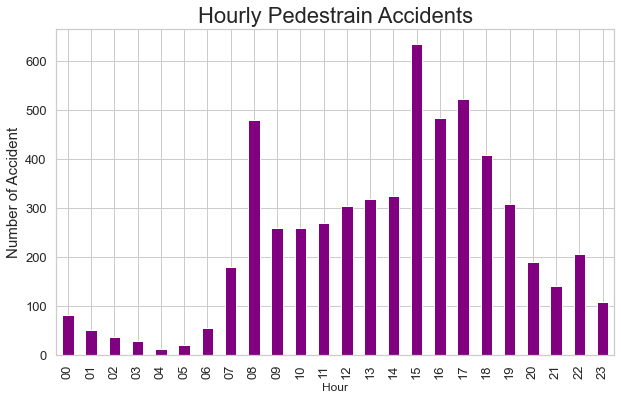

In [454]:
pedestrian_by_hour = pedestrian_accidents['Hour'].groupby(pedestrian_accidents['Hour']).count()
ax = pedestrian_by_hour.plot(kind = 'bar', figsize = (10,6),color = 'purple',fontsize =13);
ax.set_alpha(0.8)
ax.set_title('Hourly Pedestrain Accidents', fontsize= 22)
ax.set_ylabel('Number of Accident', fontsize = 15)
plt.show() 

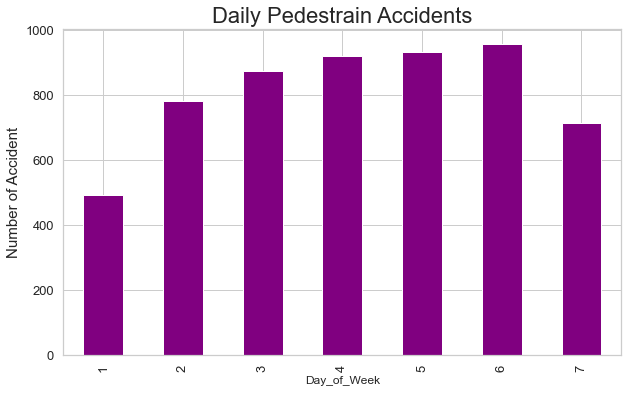

In [455]:
pedestrian_by_day = pedestrian_accidents['Day_of_Week'].groupby(pedestrian_accidents['Day_of_Week']).count()
ax = pedestrian_by_day.plot(kind = 'bar', figsize = (10,6),color = 'purple',fontsize =13);
ax.set_alpha(0.8)
ax.set_title('Daily Pedestrain Accidents', fontsize= 22)
ax.set_ylabel('Number of Accident', fontsize = 15)
plt.show()

## D. What impact ,if any, does daylight saving have on road traffic accidents in the week after its starts and stops?

In [456]:
accidents['Date']

0        04/01/2019
1        04/01/2019
2        04/01/2019
3        07/01/2019
4        07/01/2019
            ...    
87527    03/08/2019
87528    03/08/2019
87529    03/08/2019
87530    03/08/2019
87531    03/08/2019
Name: Date, Length: 87532, dtype: object

In [457]:
# First is to get equivqlent day of the year from date colunm
import re
import datetime

In [458]:
for index in accidents['Date'].index:
    extracted_date = accidents.at[index,'Date']
    list_of_dates = re.split('/',extracted_date)
    list_date = [int(date) for date in list_of_dates]
    day_of_year = datetime.date(list_date[2],list_date[1],list_date[0]).timetuple().tm_yday
    accidents.at[index,'day_of_year']= int(day_of_year)

In [459]:
accidents['day_of_year']

0          4.0
1          4.0
2          4.0
3          7.0
4          7.0
         ...  
87527    215.0
87528    215.0
87529    215.0
87530    215.0
87531    215.0
Name: day_of_year, Length: 87532, dtype: float64

Daylight began on March 31, 2019, the 90th day of the year, and concluded on October 27, 2019, the 300th day of the year. The week after it began included days ranging from 90 to 96. ( inclusive). The following week is paused, which implies days between 300 and 306. However, in order to determine the impact, we must know the accident rate before and after dawn.

In [460]:
week_before_daylight_start = 0
week_after_daylight = 0
week_before_end = 0
week_after_end = 0
for index in accidents['day_of_year'].index:
    day_of_year = accidents.at[index,'day_of_year']
    if(day_of_year >=83) and (day_of_year <=89):
        
        week_before_daylight_start = week_before_daylight_start + 1
    elif (day_of_year >=90) and (day_of_year <=96):
        week_after_daylight = week_after_daylight + 1
    elif (day_of_year >= 293) and (day_of_year <= 299):
        week_before_end = week_before_end + 1
        
    elif (day_of_year >= 300) and (day_of_year <= 306):
        week_after_end = week_after_end + 1
        
    else :
        pass

In [461]:
print ('Number of Accidents a week before start of daylight is: ', week_before_daylight_start)
print ('*************************************')
print ('Number of Accidents a week_after_daylight is: ', week_after_daylight )
print ('******************************')
print ('Number of Accidents a week_before_end is: ', week_before_end)
print ('*******************************')
print ('Number of Accidents a week_after_end is: ', week_after_end)
print ('***************************')

Number of Accidents a week before start of daylight is:  1916
*************************************
Number of Accidents a week_after_daylight is:  1623
******************************
Number of Accidents a week_before_end is:  1584
*******************************
Number of Accidents a week_after_end is:  1559
***************************


## E. WHAT IS IMPACT, IF ANY , DOES SUNRISE AND SUNSET TIMES HAVE ON ROAD TRAFFIC ACCIDENTS?

In [462]:
# It is assummed that sun rises by 6am to 7am and it sunset is by sets by 6pm to 7pm.
accidents['Hour']= pd.to_numeric(accidents['Hour'],errors = 'coerce').astype('Int64')

In [473]:
sunrise1_count = 0
sunset1_count = 0
for index in accidents['Hour'].index:
    hour_of_day = accidents.at[index,'Hour']
    if (6 >= hour_of_day <= 7)   and (18 >= hour_of_day <= 19 ):
        sunrise1_count = sunset1_count + 1
    else:
        sunset1_count = sunset1_count + 1
       

In [474]:
print('The count of accidents at Sunrise is ', sunrise1_count)
print('The count of accidents at Sunset is ', sunset1_count)

The count of accidents at Sunrise is  82206
The count of accidents at Sunset is  82319


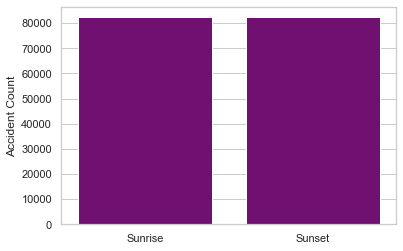

In [475]:
x = ['Sunrise', 'Sunset']
counts = [sunrise1_count,sunset1_count]
sns.barplot(x=x,y = counts,color = 'purple')
plt.ylabel('Accident Count')
plt.show()

In [477]:
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
105,2019010155425,1,9,0,18,9,0,0,0,7,...,6,1,23,5,2996,1,1,2,1,2
182,2019010155627,2,9,0,18,0,8,0,0,0,...,6,1,40,7,1388,1,14,5,1,5
201,2019010155655,1,8,0,9,0,1,0,0,0,...,1,1,48,8,1798,8,7,3,1,3
415,2019010156081,1,19,0,18,0,1,0,0,0,...,2,1,46,8,2143,2,1,6,1,6
458,2019010156197,1,3,0,3,0,1,0,0,0,...,6,2,55,8,124,1,11,4,1,4


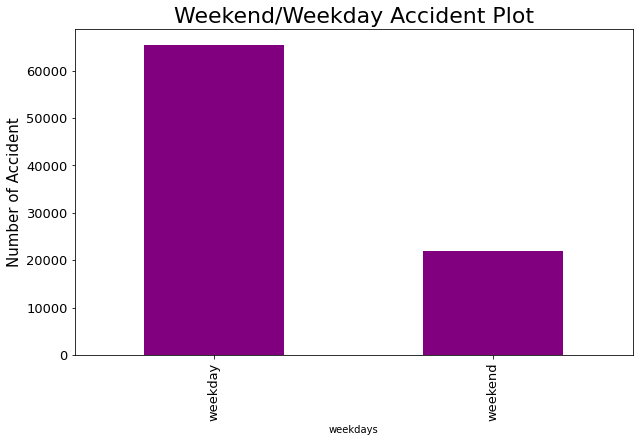

In [100]:
week_day = accidents['weekdays'].groupby(accidents['weekdays']).count()
ax = week_day.plot(kind = 'bar', figsize = (10,6),color = 'purple',fontsize =13);
ax.set_alpha(0.8)
ax.set_title('Weekend/Weekday Accident Plot', fontsize= 22)
ax.set_ylabel('Number of Accident', fontsize = 15)
plt.show()

## F.  ARE THERE PARTICULAT TYPES OF VEHICLES THAT ARE MORE FREQUENTLY INVOLVED IN ROAD TRAFFIC ACCIDENTS?

In [102]:
vari_lookup = pd.read_excel('variable lookup.xls',sheet_name = 'Vehicle Type')
vari_lookup

,code,label
0,1,Pedal cycle
1,2,Motorcycle 50cc and under
2,3,Motorcycle 125cc and under
3,4,Motorcycle over 125cc and up to 500cc
4,5,Motorcycle over 500cc
5,8,Taxi/Private hire car
6,9,Car
7,10,Minibus (8 - 16 passenger seats)
8,11,Bus or coach (17 or more pass seats)
9,16,Ridden horse


In [103]:
import xlrd
var_look = xlrd.open_workbook('variable lookup.xls', on_demand=True)

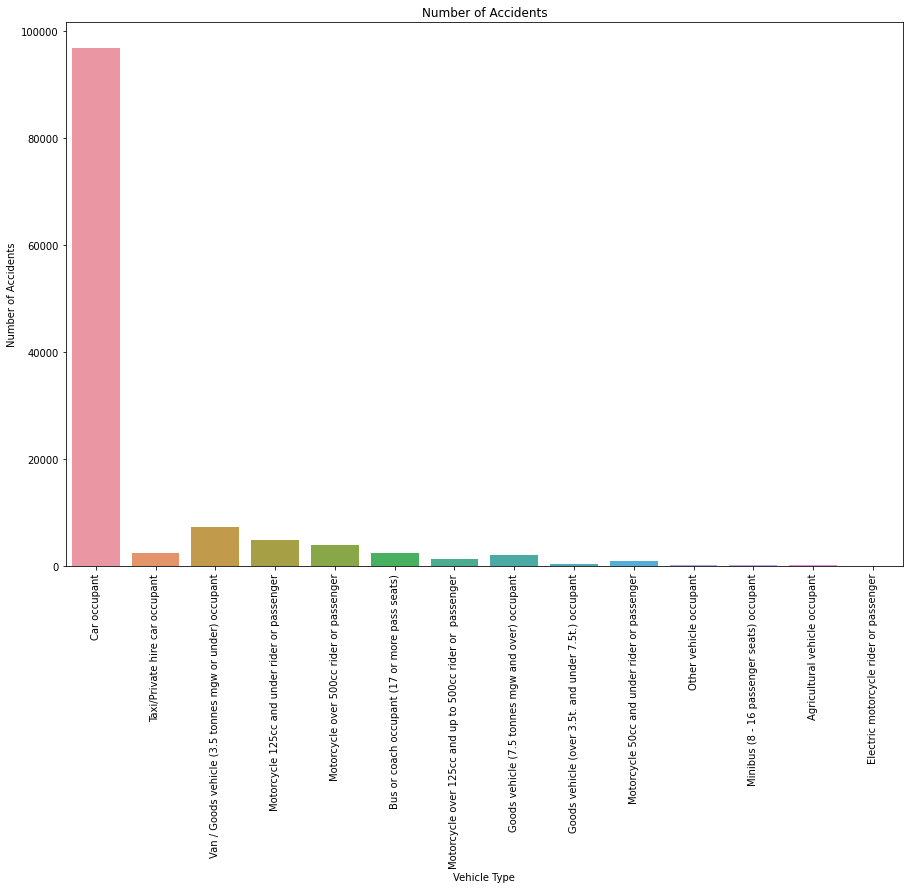

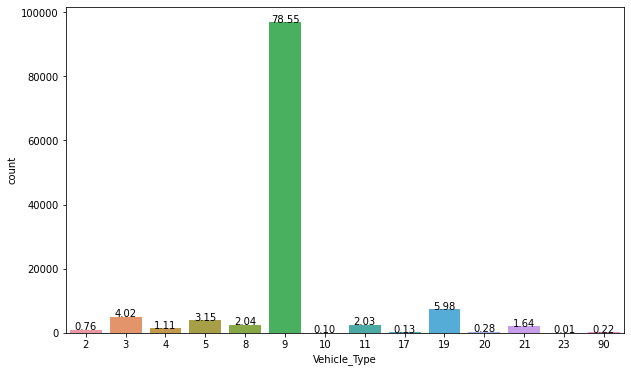

In [104]:
cars = pd.DataFrame.copy(vehicles)
#cars = cars["Vehicle_Type"].value_counts(dropna =False)
df2 = pd.read_excel(var_look,'Casualty Type')
order = df2.iloc[:,1]
case_lookup = pd.read_excel(var_look,"Casualty Type")
merged_vehicle = pd.merge(cars, case_lookup, left_on='Vehicle_Type', right_on='code')
plt.figure(figsize=(15,10))
sns.countplot(x= 'label' ,data=merged_vehicle)
plt.xticks(rotation= 90)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents')
plt.figure(figsize=(10,6))
td = float(len(vehicles) )

ax = sns.countplot(x="Vehicle_Type", data=vehicles)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 2,
            '{:1.2f}'.format((height/td)*100),
            ha="center") 
plt.show()

In [483]:
vehicles.describe()

,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
count,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,...,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000,123291.000000
mean,1.522804,9.555093,0.024641,12.790041,0.126003,2.233691,0.233537,0.358193,0.407443,0.525959,...,4.487448,1.342053,41.767469,7.045064,1845.345021,1.603102,8.260214,5.159160,1.343083,5.159160
std,0.726745,5.031318,0.280220,6.070384,0.971971,2.989514,0.836814,1.699455,1.443517,2.068954,...,1.986170,0.479298,16.795454,1.790018,1607.788222,1.127295,5.444430,2.802736,0.689345,2.802736
min,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,9.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,28.000000,6.000000,1242.000000,1.000000,4.000000,3.000000,1.000000,3.000000
50%,1.000000,9.000000,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,1.000000,39.000000,7.000000,1596.000000,1.000000,8.000000,5.000000,1.000000,5.000000
75%,2.000000,9.000000,0.000000,18.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,2.000000,53.000000,8.000000,1993.000000,2.000000,12.000000,8.000000,1.000000,8.000000
max,20.000000,90.000000,5.000000,18.000000,9.000000,8.000000,5.000000,12.000000,8.000000,11.000000,...,6.000000,3.000000,102.000000,11.000000,29980.000000,12.000000,94.000000,10.000000,3.000000,10.000000


In [491]:
cause_columns = ['Speed_limit','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities'
                  ,'Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Special_Conditions_at_Site'
                 , 'Carriageway_Hazards']

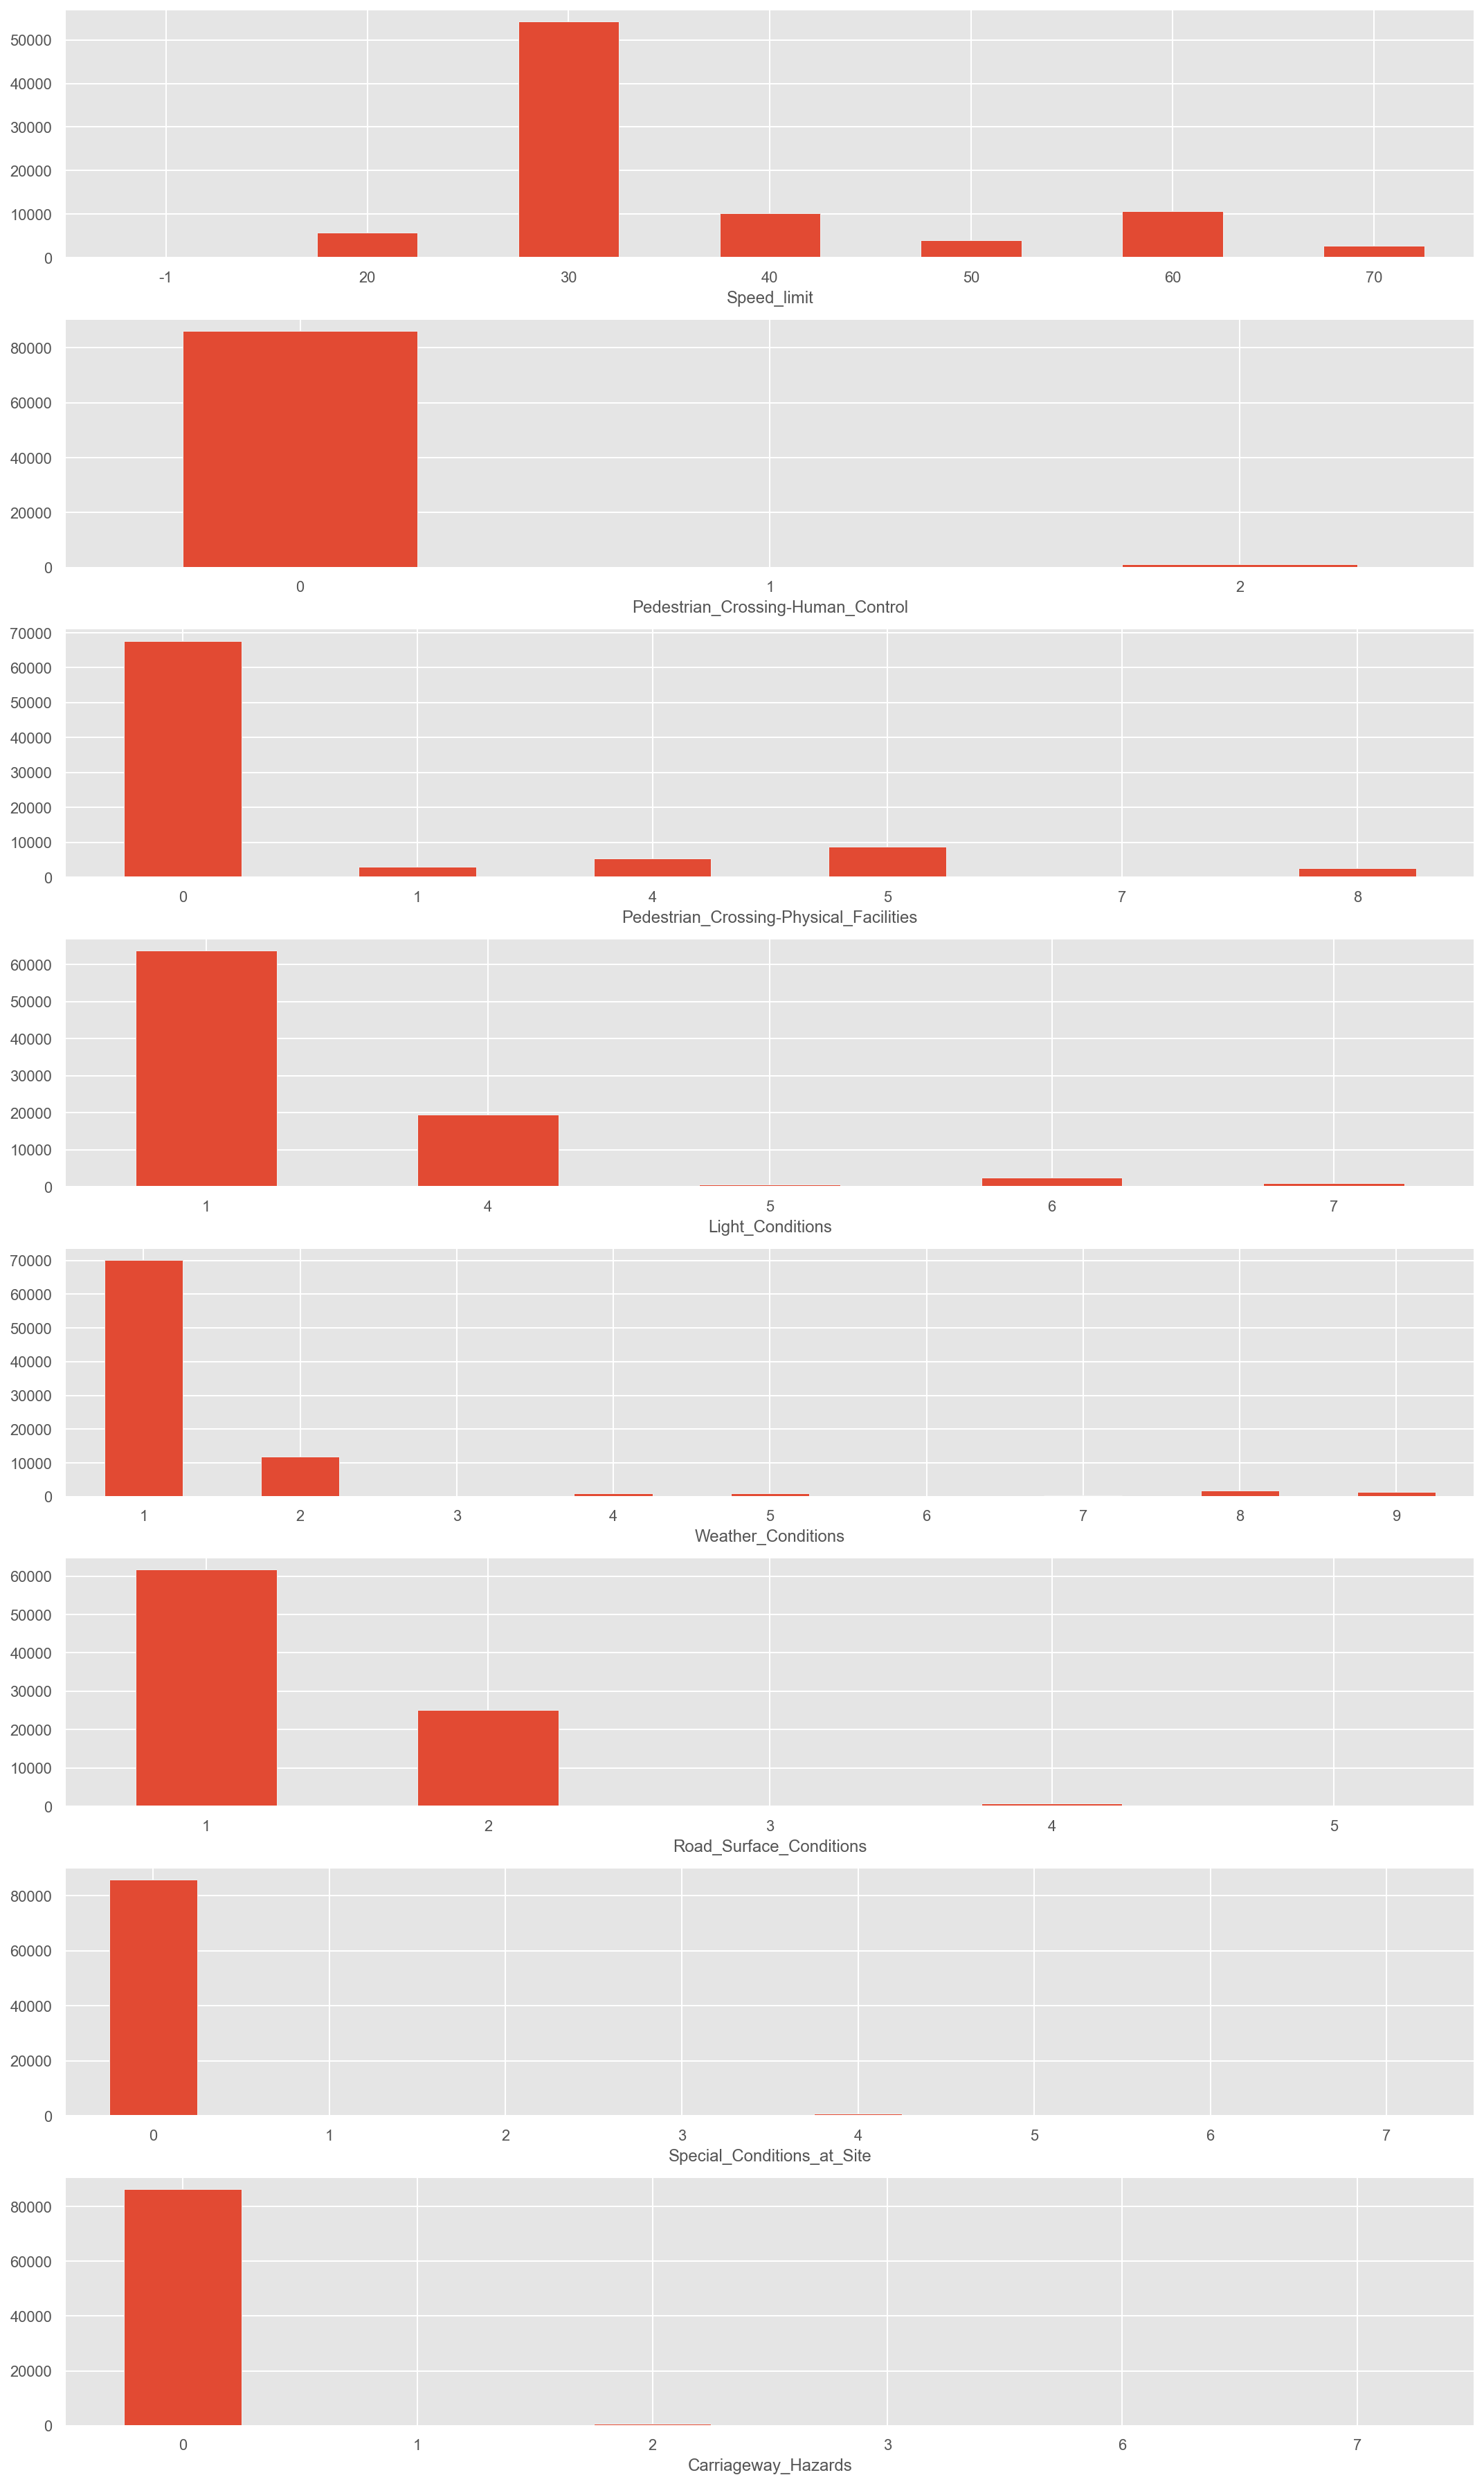

In [492]:
plt.figure(figsize=(15,25))
counter = 0
for i in cause_columns:
    plt.subplot(8,1,counter+1)
    plt.xticks([])
    accidents[i].groupby(accidents[i]).count().plot(kind="bar")
    counter = counter + 1
plt.tight_layout()
plt.show()

In [105]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%d/%m/%Y")

In [106]:
# create a dictionary to later look up the groups I will create
Groups_dayime = {1: 'Morning (5-10)', 
                  2: 'Afternoon (10-15)', 
                  3: 'Rush_Hour (15-19)', 
                  4: 'Evening (19-23)', 
                  5: 'Night(23-5)'}

In [107]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
#accidents['Hour'] = accidents['Hour'].astype('int')

In [108]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning (5-10)"
    elif hour >= 10 and hour < 15:
        return "Afternoon (10-15)"
    elif hour >= 15 and hour < 19:
        return "Rush_Hour (15-19)"
    elif hour >= 19 and hour < 23:
        return "Evening (19-23)"
    else:
        return "Night (23-5)"
# apply thus function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head(6)

,Time,Hour,Daytime
0,01:30,1,Night (23-5)
1,01:30,1,Night (23-5)
2,01:30,1,Night (23-5)
3,09:04,9,morning (5-10)
4,17:54,17,Rush_Hour (15-19)
5,17:54,17,Rush_Hour (15-19)


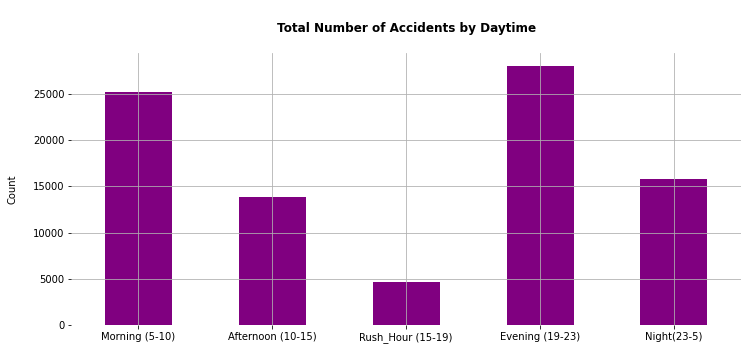

In [109]:
# define labels by accessing look up dictionary above
label = tuple(Groups_dayime.values())

# plot total no. of accidents by daytime
accidents.groupby('Daytime').size().plot(kind='bar', color='Purple', figsize=(12,5), grid=True)
plt.xticks(np.arange(5), label, rotation='horizontal')
plt.xlabel(''), plt.ylabel('Count\n')
plt.title('\nTotal Number of Accidents by Daytime\n', fontweight='bold')
sns.despine(top=True, right=True, left=True, bottom=True);

In [110]:
weekday_counts = pd.DataFrame(accidents.set_index('Date').resample('1d')['Accident_Index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']
#weekday_counts

weekday = weekday_counts['Weekday'] = weekday_counts['Date'].dt.strftime("%A")
#weekday

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)

weekday_averages

,Average_Accidents
Weekday,
Friday,271.192308
Monday,234.153846
Saturday,231.519231
Sunday,192.903846
Thursday,255.211538
Tuesday,243.566038
Wednesday,250.076923


In [111]:
weekday = accidents['Date'].dt.strftime("%A")
month    = accidents['Date'].dt.strftime('%B').sort_index()

accident_table = accidents.groupby([month, weekday]).size()
accident_table = accident_table.rename_axis(['Month', 'Weekday'])\
                               .unstack('Weekday')
accident_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
April,1082,1062,942,924,1011,1337,1091
August,1531,925,1147,818,1247,966,877
December,1062,1204,892,837,923,1162,981
February,789,930,821,731,899,767,853
January,879,796,627,493,1019,1056,1076
July,1098,1297,1011,866,1135,1255,1297
June,1231,954,1255,1011,1125,1077,1107
March,1262,1029,1196,957,996,1027,1026
May,1300,964,939,787,1411,1101,1387


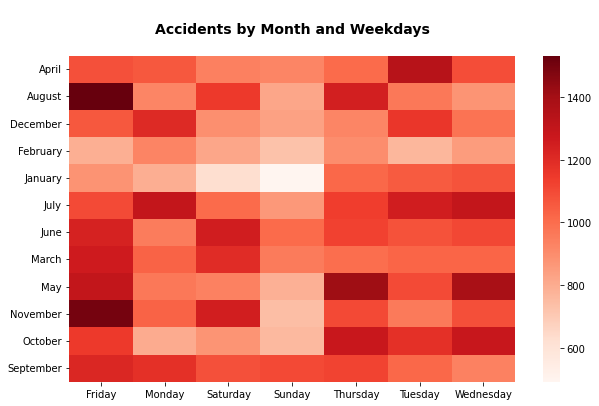

In [112]:
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Month and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

##  G.	Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?

In [113]:
weather_table = accidents.set_index('Date').sort_index()\
                                           .groupby(['Weather_Conditions', pd.Grouper(freq='Y')])\
                                           .size()\
                                           .unstack('Weather_Conditions')
weather_table

Weather_Conditions,1,2,3,4,5,6,7,8,9
Date,,,,,,,,,
2019-12-31,70132,11852,202,965,940,15,243,1803,1380


In [114]:
# change the index values to only the year
weather_table.index = pd.to_datetime(weather_table.index, format='%m').year

# replace the weather conditions' values with explanation
weather_table.columns = ['Data Missing', 'Fine no high winds', 'Raining no high winds', 'Snowing no high winds',
                        'Fine + high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist',
                        'Other']
weather_table

,Data Missing,Fine no high winds,Raining no high winds,Snowing no high winds,Fine + high winds,Raining + high winds,Snowing + high winds,Fog or mist,Other
Date,,,,,,,,,
2019,70132,11852,202,965,940,15,243,1803,1380


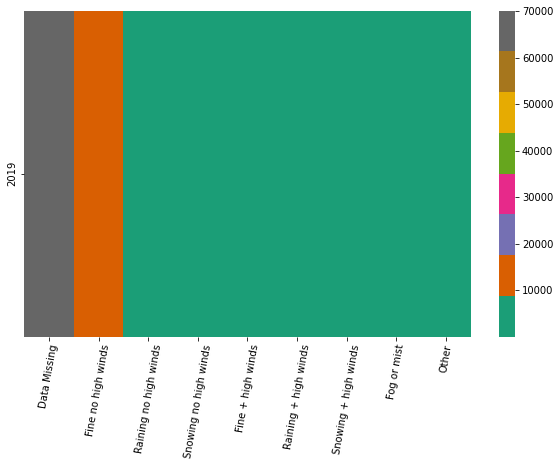

In [115]:
plt.figure(figsize=(10,6))
sns.heatmap(weather_table, cmap='Dark2')

# rotate xticks for better readability
plt.xticks(rotation=80)
plt.ylabel('');

In [116]:
weather_lookup = pd.read_excel(var_look,"Weather")
weather_lookup

,code,label
0,1,Fine no high winds
1,2,Raining no high winds
2,3,Snowing no high winds
3,4,Fine + high winds
4,5,Raining + high winds
5,6,Snowing + high winds
6,7,Fog or mist
7,8,Other
8,9,Unknown
9,-1,Data missing or out of range


In [117]:
light_lookup = pd.read_excel(var_look,"Light Conditions")
light_lookup

,code,label
0,1,Daylight
1,4,Darkness - lights lit
2,5,Darkness - lights unlit
3,6,Darkness - no lighting
4,7,Darkness - lighting unknown
5,-1,Data missing or out of range


In [118]:
light_conditions = accidents[['Light_Conditions']]
weather_conditions = accidents[['Weather_Conditions']]
no_of_casualties = accidents["Number_of_Casualties"].value_counts(dropna =False)
weather_conditions.isnull().any()
light_conditions.columns

Index(['Light_Conditions'], dtype='object')

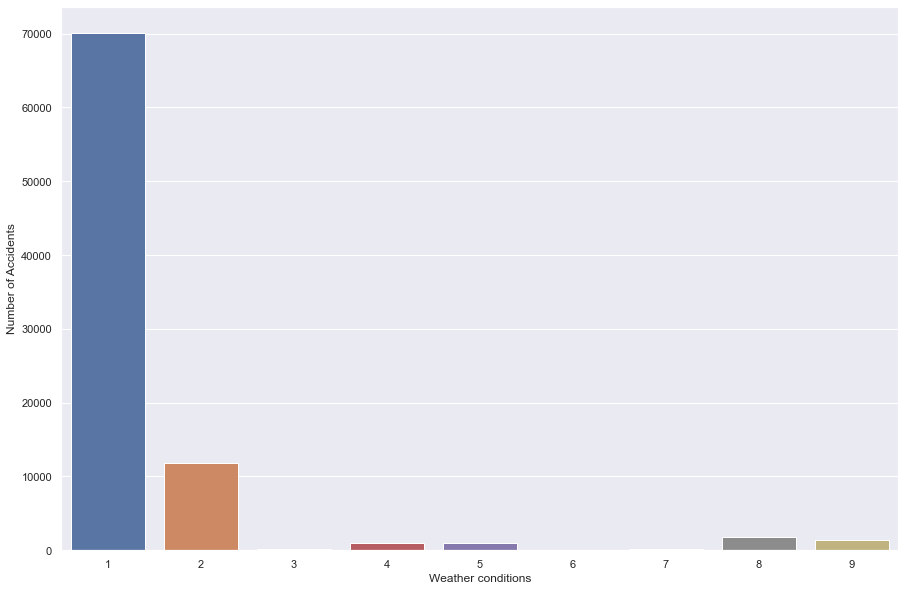

In [119]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation= 0)
weatherplot = sns.countplot(x='Weather_Conditions',data=weather_conditions)
weatherplot.set(xlabel='Weather conditions', ylabel='Number of Accidents')
plt.show()

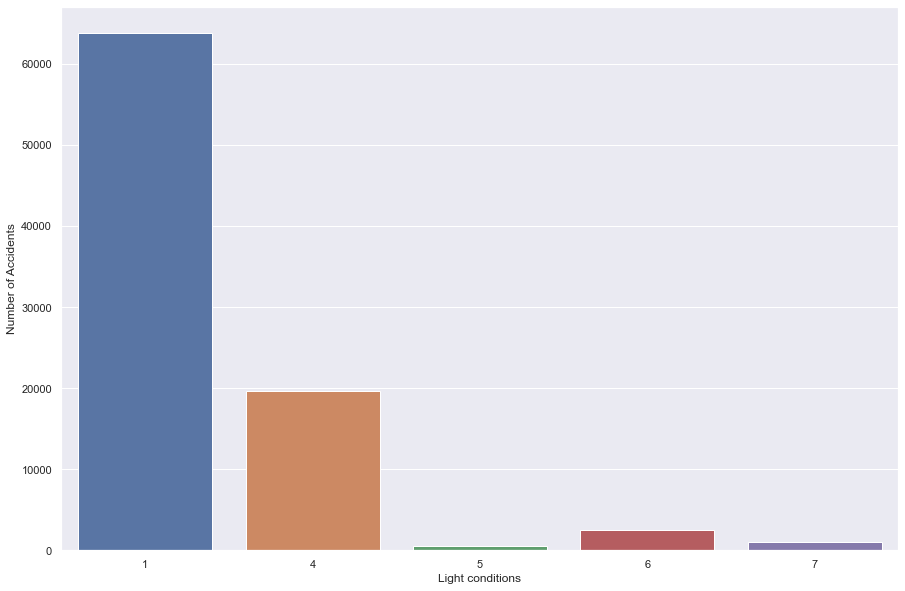

In [120]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
plt.xticks(rotation= 0)
weatherplot = sns.countplot(x='Light_Conditions',data=light_conditions)
weatherplot.set(xlabel='Light conditions', ylabel='Number of Accidents')
plt.show()

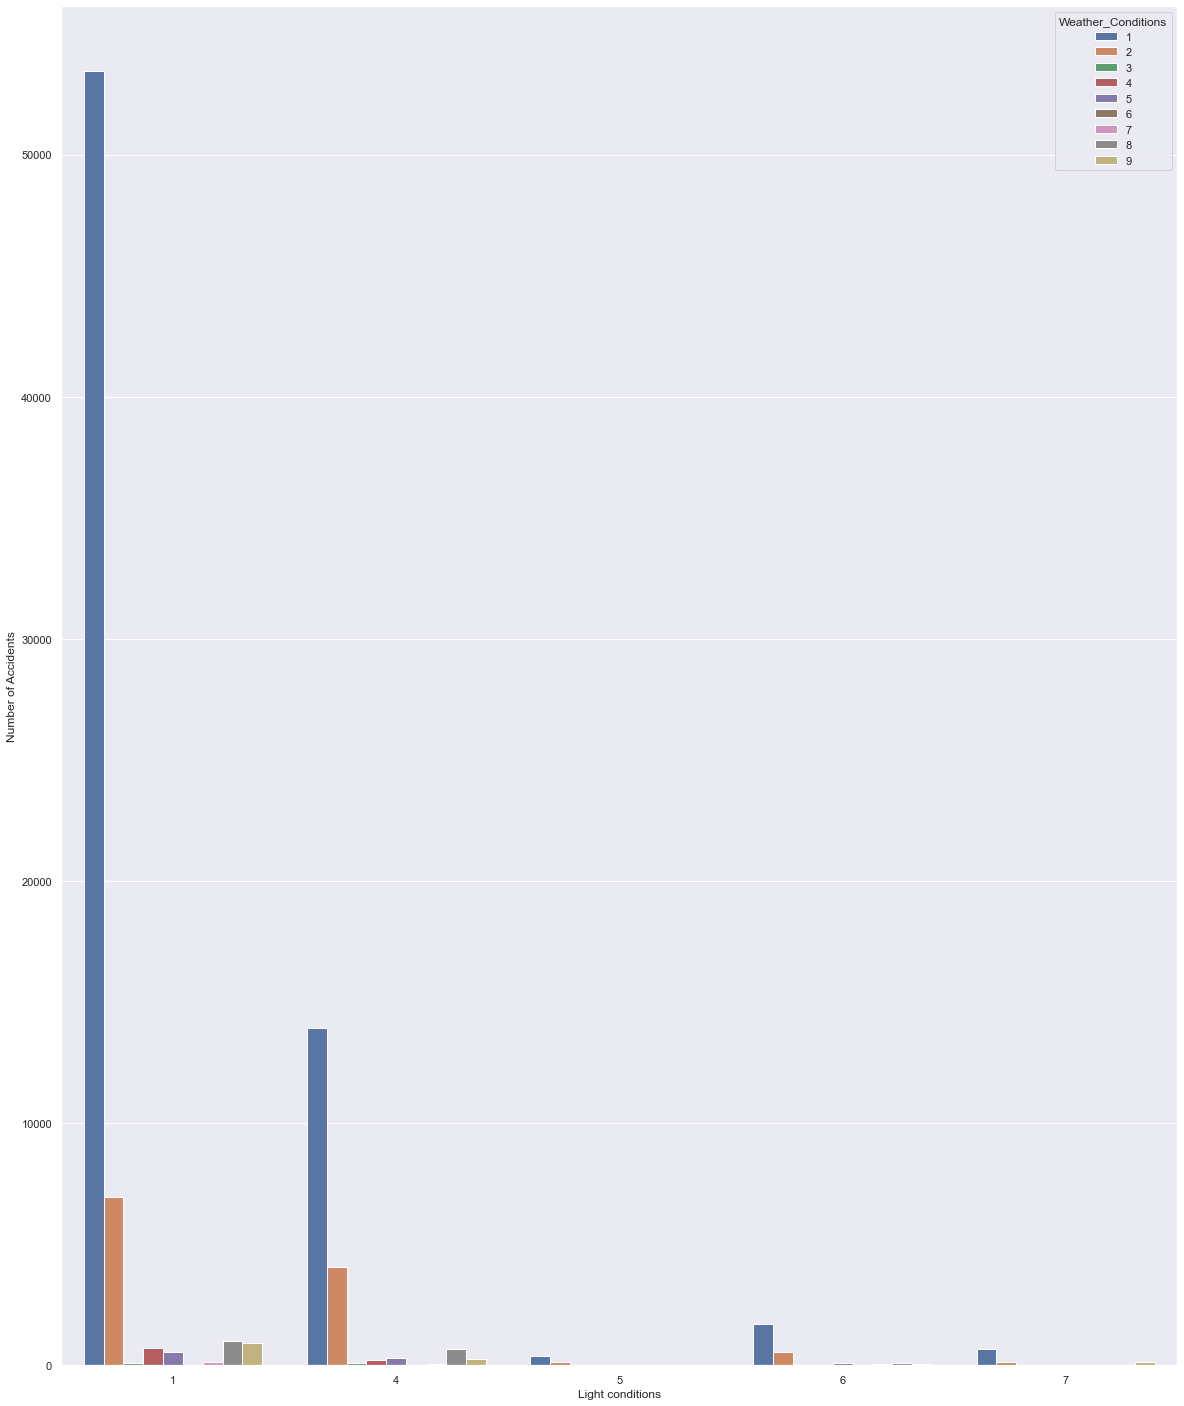

In [121]:
data_frame_conditions = accidents[['Light_Conditions','Weather_Conditions']]
data_frame_conditions.columns
sns.set(style="darkgrid")
plt.figure(figsize=(20,25))
plt.xticks(rotation= 0)
weatherplot = sns.countplot(x='Light_Conditions',data=data_frame_conditions,hue="Weather_Conditions")
weatherplot.set(xlabel='Light conditions', ylabel='Number of Accidents')
plt.show()

In [122]:
urban_rural = accidents[['Urban_or_Rural_Area','Speed_limit','Road_Surface_Conditions']]
urban_rural.head()

,Urban_or_Rural_Area,Speed_limit,Road_Surface_Conditions
0,1,20,1
1,1,20,1
2,1,20,1
3,1,30,1
4,1,20,1


In [123]:
area_lookup = pd.read_excel(var_look,"Urban Rural")
area_lookup
merged_urban = pd.merge(urban_rural, area_lookup, left_on='Urban_or_Rural_Area', right_on='code')
merged_urban

,Urban_or_Rural_Area,Speed_limit,Road_Surface_Conditions,code,label
0,1,20,1,1,Urban
1,1,20,1,1,Urban
2,1,20,1,1,Urban
3,1,30,1,1,Urban
4,1,20,1,1,Urban
...,...,...,...,...,...
87527,2,60,1,2,Rural
87528,2,60,1,2,Rural
87529,2,60,1,2,Rural
87530,2,60,1,2,Rural


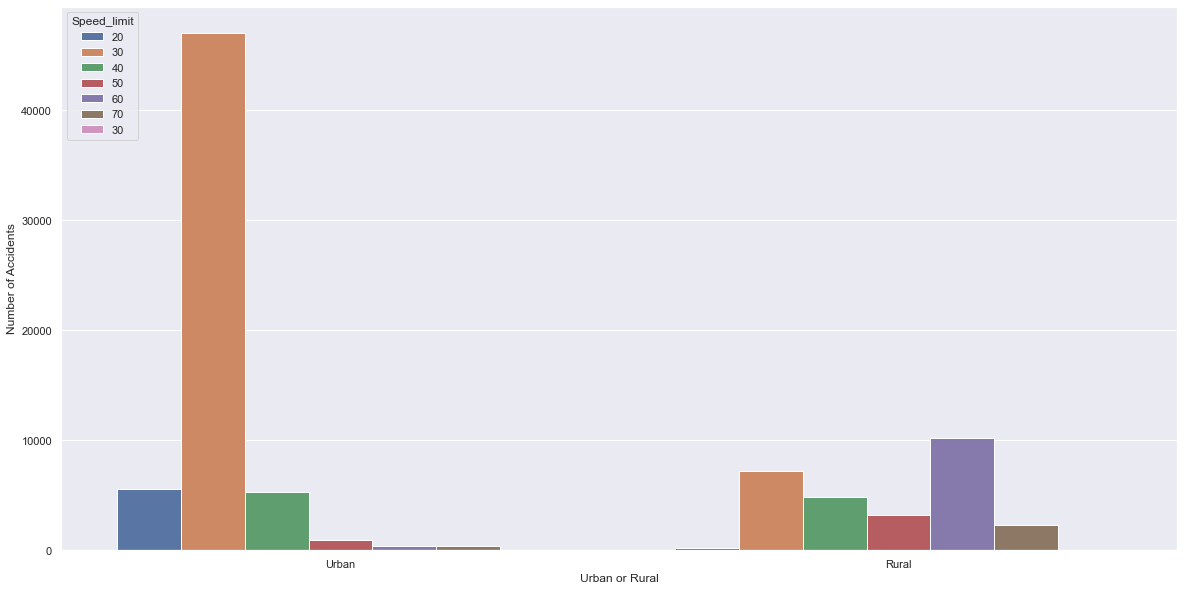

In [124]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
plt.xticks(rotation= 0)
weatherplot = sns.countplot(x='label',data=merged_urban,hue="Speed_limit")
weatherplot.set(xlabel='Urban or Rural', ylabel='Number of Accidents')
plt.show()

##  (h)	How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

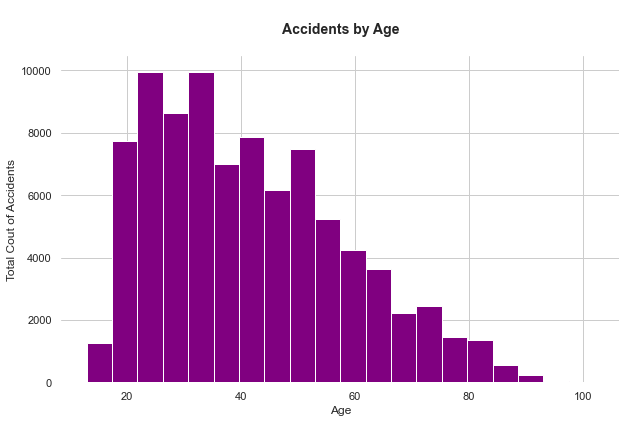

In [125]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
accidents.Age_of_Driver.hist(bins=20, ax=ax, color='Purple')
ax.set_title('\nAccidents by Age\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Age', ylabel='Total Cout of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

In [126]:
#Merge Ageband by code
age_band = vehicles["Age_Band_of_Driver"].value_counts(dropna =False)
age_band_lookup = pd.read_excel('variable lookup.xls',sheet_name="Age Band")
merged_age_band = pd.merge(age_band, age_band_lookup, left_index=True, right_on='code')
merged_age_band = merged_age_band[merged_age_band["code"]!=-1]
merged_age_band

,Age_Band_of_Driver,code,label
5,28864,6,26 - 35
6,22796,7,36 - 45
7,21502,8,46 - 55
8,14211,9,56 - 65
4,14000,5,21 - 25
3,9649,4,16 - 20
9,7296,10,66 - 75
10,4931,11,Over 75
2,41,3,11 - 15
1,1,2,6 - 10


Text(0.5, 1.0, 'Number of Accidents Given Driver Age band')

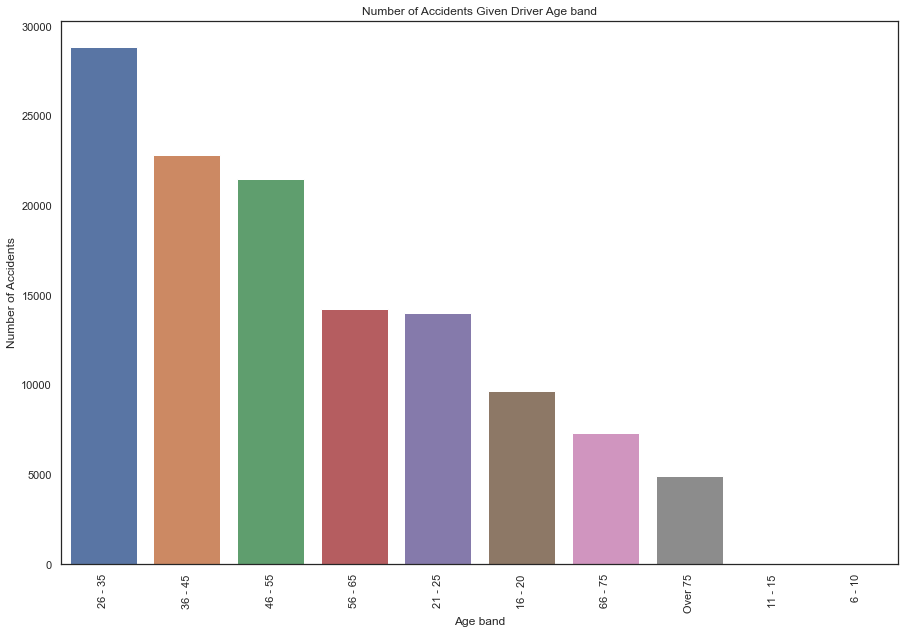

In [127]:
#Plot Driver Ageband vs Number of accidents
plt.figure(figsize=(15,10))
sns.barplot(x=merged_age_band["label"], y=merged_age_band["Age_Band_of_Driver"])
plt.xticks(rotation= 90)
plt.xlabel('Age band')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Given Driver Age band')

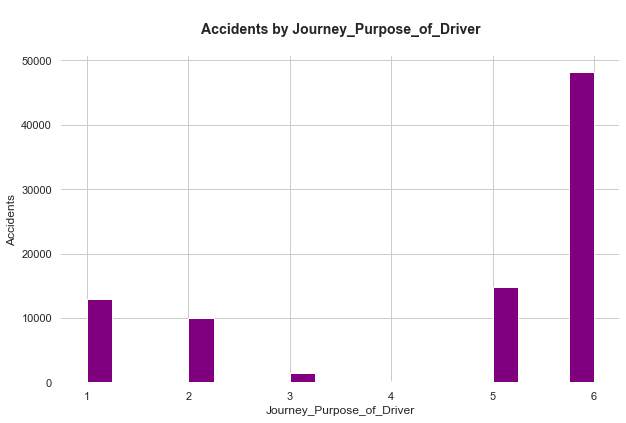

In [128]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
accidents.Journey_Purpose_of_Driver.hist(bins=20, ax=ax, color='Purple')
ax.set_title('\nAccidents by Journey_Purpose_of_Driver\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Journey_Purpose_of_Driver', ylabel='Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

In [129]:
# create a new dataframe
drivers = vehicles.groupby(['Age_Band_of_Driver', 'Sex_of_Driver']).size().reset_index()

# drop the values that have no value
drivers.drop(drivers[(drivers['Age_Band_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == -1) | \
                     (drivers['Sex_of_Driver'] == 3)]\
                     .index, axis=0, inplace=True)
# rename the columns
drivers.columns = ['Age_Band_of_Driver', 'Sex_of_Driver', 'Count']

# rename the values to be more convenient for the reader resp. viewer
drivers['Sex_of_Driver'] = drivers['Sex_of_Driver'].map({1: 'male', 2: 'female'})
drivers['Age_Band_of_Driver'] = drivers['Age_Band_of_Driver'].map({1: '0 - 5', 2: '6 - 10', 3: '11 - 15',
                                                                   4: '16 - 20', 5: '21 - 25', 6: '26 - 35',
                                                                   7: '36 - 45', 8: '46 - 55', 9: '56 - 65',
                                                                   10: '66 - 75', 11: 'Over 75'})

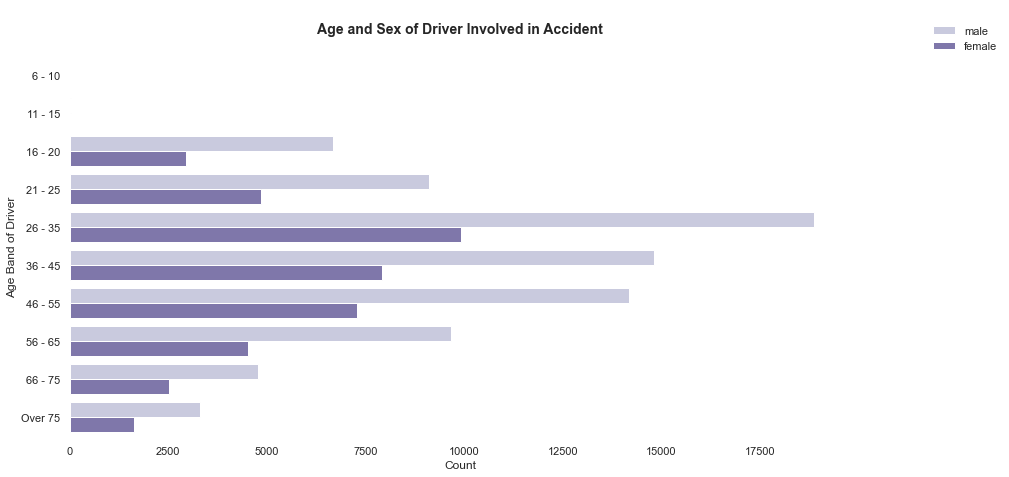

In [130]:
# seaborn barplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(y='Age_Band_of_Driver', x='Count', hue='Sex_of_Driver', data=drivers, palette='Purples')
ax.set_title('\nAge and Sex of Driver Involved in Accident\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Count', ylabel='Age Band of Driver')
ax.legend(bbox_to_anchor=(1.1, 1.), borderaxespad=0., frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

##  (i)	Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models? 

In [131]:
sev_accident = accidents[accidents['Accident_Severity'] == 3]
grave_accident = accidents[accidents['Number_of_Casualties']>=3]
grave_accident.shape[0]/accidents.shape[0]

0.2117282822282137

It can be observed that the percentage of serious accidents is 21%. . Let's try to see the different links between the data to have a better understanding of the data but also to check the consistency of the data and its quality.

In [132]:
df_clean.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Months,Hour,weekdays
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,1,1,0,0,1,3,E01004762,02,17,weekday
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,1,1,0,0,1,1,E01000943,01,01,weekday
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,1,1,0,0,1,1,E01000973,01,01,weekday
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,1,1,0,0,1,1,E01000546,01,00,weekday
6,2019010155196,532424.0,164886.0,-0.099071,51.367605,1,3,1,1,01/01/2019,...,1,1,0,0,1,1,E01001043,01,01,weekday


In [133]:
# Attributes present in the dataset
print("Dataset Attributes:")
for i in df_clean.columns:
    print("\t" + i)

Dataset Attributes:
	Accident_Index
	Location_Easting_OSGR
	Location_Northing_OSGR
	Longitude
	Latitude
	Police_Force
	Accident_Severity
	Number_of_Vehicles
	Number_of_Casualties
	Date
	Day_of_Week
	Time
	Local_Authority_(District)
	Local_Authority_(Highway)
	1st_Road_Class
	1st_Road_Number
	Road_Type
	Speed_limit
	Junction_Detail
	Junction_Control
	2nd_Road_Class
	2nd_Road_Number
	Pedestrian_Crossing-Human_Control
	Pedestrian_Crossing-Physical_Facilities
	Light_Conditions
	Weather_Conditions
	Road_Surface_Conditions
	Special_Conditions_at_Site
	Carriageway_Hazards
	Urban_or_Rural_Area
	Did_Police_Officer_Attend_Scene_of_Accident
	LSOA_of_Accident_Location
	Months
	Hour
	weekdays


In [134]:
df = df_clean.drop(columns=[
    'Accident_Index',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards',
    'Junction_Detail',
    'LSOA_of_Accident_Location',
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    '1st_Road_Class',
    '1st_Road_Number',
    '2nd_Road_Class',
    '2nd_Road_Number'
])

In [135]:
def countAttributeFrequency(classes):
    cl = np.unique(classes)
    ncl = np.zeros(len(cl))
    for i in np.arange(0, len(cl)):
        a = classes == cl[i]
        ncl[i] = len(classes[a])

    for i, j in zip(cl, ncl):
        print("\t" + str(i) + ": " + str(int(j)))

In [136]:
#Getting the unique values of some non-binary attributes and their frequency
print("====== Unique values of relevant attributes and their frequencies ======")
print("Accident_Severity:")
countAttributeFrequency(df['Accident_Severity'])

print("\nRoad_Type:")
countAttributeFrequency(df['Road_Type'])


print("\nJunction_Control:")
countAttributeFrequency(df['Junction_Control'])

print("\nPedestrian_Crossing-Human_Control:")
countAttributeFrequency(df['Pedestrian_Crossing-Human_Control'])

print("\nPedestrian_Crossing-Physical_Facilities:")
countAttributeFrequency(df['Pedestrian_Crossing-Physical_Facilities'])

print("\nLight_Conditions:")
countAttributeFrequency(df['Light_Conditions'])

print("\nWeather_Conditions:")
countAttributeFrequency(df['Weather_Conditions'])

print("\nRoad_Surface_Conditions:")
countAttributeFrequency(df['Road_Surface_Conditions'])

====== Unique values ​​of relevant attributes and their frequencies ======
Accident_Severity:
	1: 570
	2: 11627
	3: 49801

Road_Type:
	1: 5845
	2: 1580
	3: 7724
	6: 45303
	7: 1028
	9: 518

Junction_Control:
	-1: 1636
	1: 350
	2: 11700
	3: 675
	4: 47637

Pedestrian_Crossing-Human_Control:
	0: 60857
	1: 266
	2: 875

Pedestrian_Crossing-Physical_Facilities:
	0: 44938
	1: 3094
	4: 4286
	5: 7380
	7: 157
	8: 2143

Light_Conditions:
	1: 44308
	4: 14788
	5: 413
	6: 1314
	7: 1175

Weather_Conditions:
	1: 49336
	2: 8125
	3: 155
	4: 632
	5: 632
	6: 11
	7: 171
	8: 1551
	9: 1385

Road_Surface_Conditions:
	1: 44700
	2: 16736
	3: 98
	4: 434
	5: 30


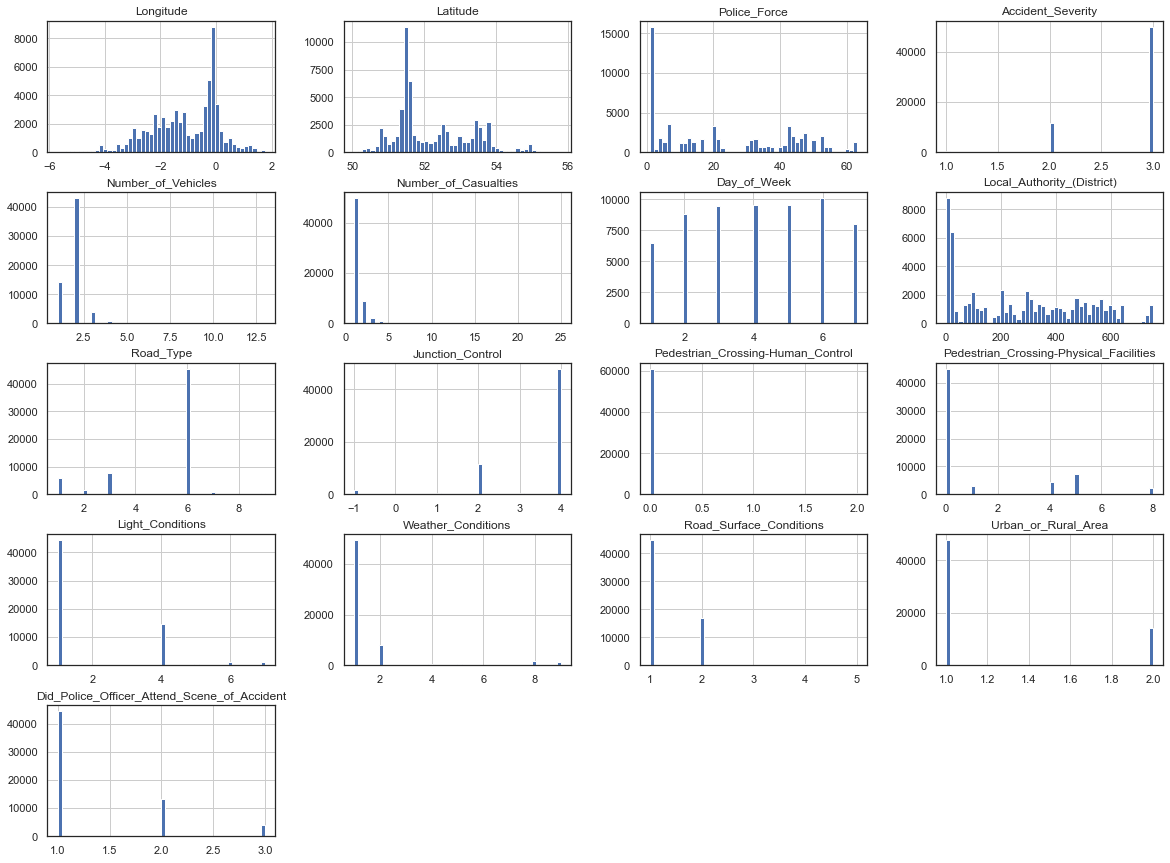

In [137]:
#Histogram of all dataset attributes
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

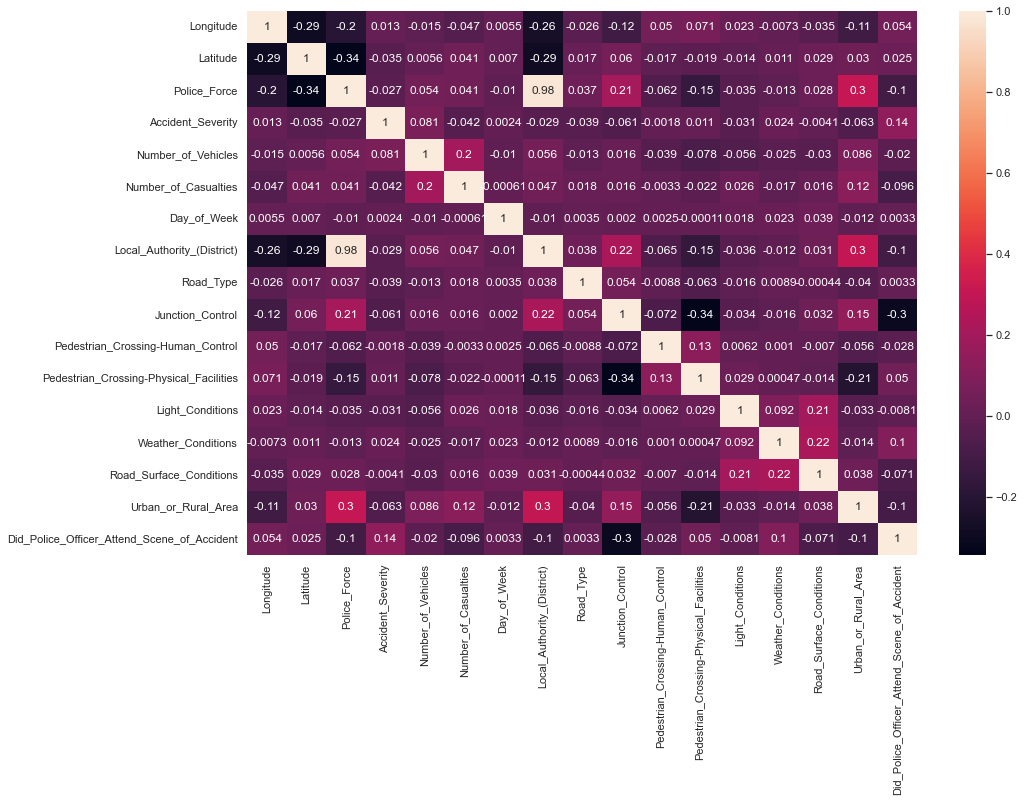

In [138]:
#Getting correlation between variables and presenting in a heatmap
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

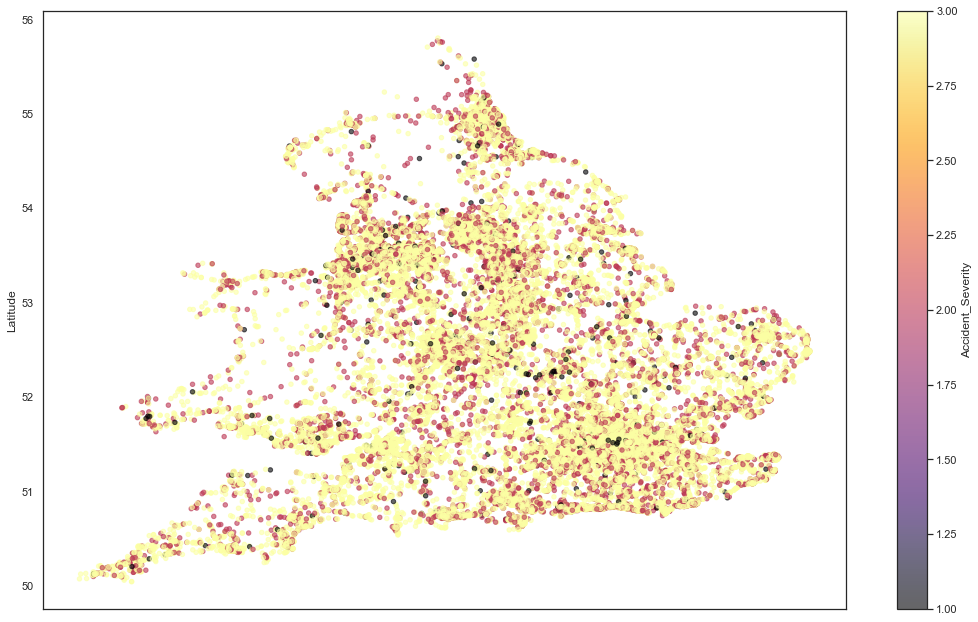

In [139]:
# Plotting the location of accidents on a graph distinguishing their severity
fig = df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.6,
                   figsize=(18,11),c="Accident_Severity", cmap=plt.get_cmap("inferno"),
                   colorbar=True,)

##  Analysis through data clustering
The idea of ​​this section is to find accidents with similar characteristics.

In [140]:
#Libraries needed for clustering
from sklearn.cluster import KMeans

In [141]:
df_group = df.drop(columns=[
    'Date',
    'Time',
    'Local_Authority_(Highway)',
    'Road_Type',
    'Junction_Control',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions',
    'Weather_Conditions',
    'Road_Surface_Conditions','weekdays','Months','Hour',
    'Did_Police_Officer_Attend_Scene_of_Accident'
])

In [229]:
df_group.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Speed_limit,Urban_or_Rural_Area
0,-0.153842,51.508057,1,3,2,3,2,1,30,1
2,-0.124193,51.526795,1,3,2,1,3,2,30,1
3,-0.191044,51.546387,1,2,1,1,3,2,20,1
4,-0.200064,51.541121,1,3,2,2,3,28,30,1
6,-0.099071,51.367605,1,3,1,1,3,20,30,1


In [142]:
# Attributes of the dataset used in the grouping
print("Gathering dataset attributes:")
for i in df_group.columns:
    print("\t" + i)

Gathering dataset attributes:
	Longitude
	Latitude
	Police_Force
	Accident_Severity
	Number_of_Vehicles
	Number_of_Casualties
	Day_of_Week
	Local_Authority_(District)
	Speed_limit
	Urban_or_Rural_Area


In [143]:
#Applying the KMeans algorithm, considering 3 groups
n_clusters = 3
X = np.array(df_group)
model = KMeans(n_clusters=n_clusters)
model.fit(X)

KMeans(n_clusters=3)

In [144]:
# Separating each group into different arrays
np_groups = [np.array([]) for x in range(n_clusters)]
np_agrup = np.array(df_group)

for g in range(len(model.labels_)):
    index = model.labels_[g]
    np_groups[index] = np.append(np_groups[index], np_agrup[g], axis=0)

for i in range(n_clusters):
    np_groups[i] = np_groups[i].reshape( int(len(np_groups[i])/10), 10)

In [146]:
#Putting all arrays into dataframes
df_groups = [pd.DataFrame(columns=df_group.columns) for x in range(n_clusters)]

for i in range(n_clusters):
    df_groups[i] = pd.DataFrame(data=np_groups[i], columns=df_group.columns)

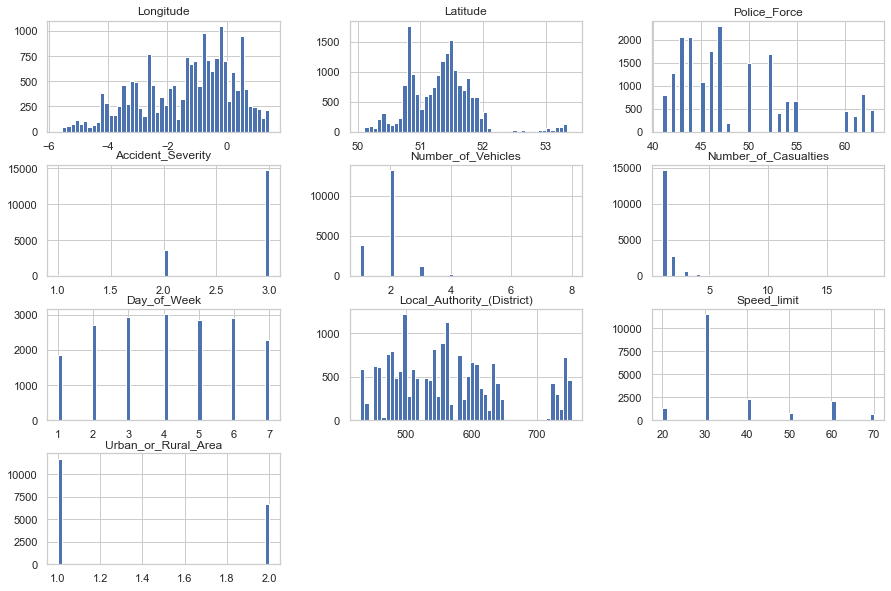

In [484]:
#Displaying frequency of each value of each attribute for each group
#Group 1
#print("====== Grupo 1 ======")
df22 = df_groups[1].astype(float)
df22.hist(bins=50, figsize=(15,10))
print("")

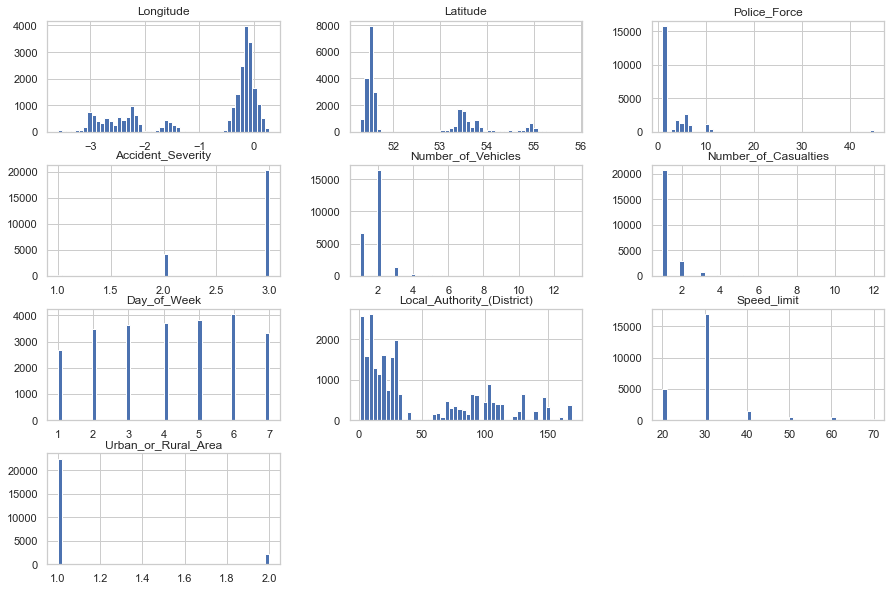

In [242]:
#Displaying frequency of each value of each attribute for each group
#Group 0
#print("====== Grupo 0 ======")
df23 = df_groups[0].astype(float)
df23.hist(bins=50, figsize=(15,10))
print("")

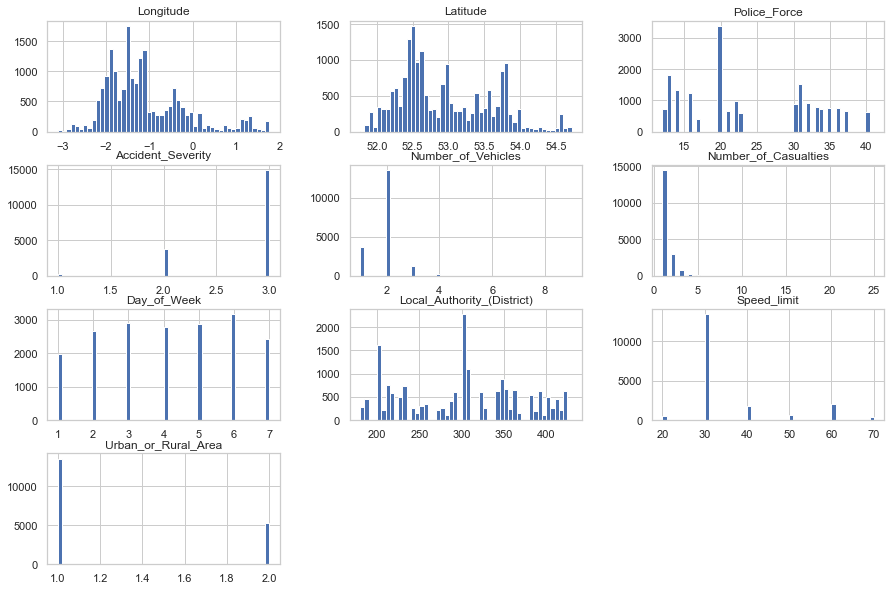

In [485]:
#Displaying frequency of each value of each attribute for each group
#Group 2
#print("====== Grupo 2 ======")
df24 = df_groups[2].astype(float)
df24.hist(bins=50, figsize=(15,10))
print("")

##  Exploration via Association rules

The idea of this section is to find out whether certain characteristics imply others.

In [151]:
from apyori import apriori

In [152]:
#Dataset original
df.head(10)

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Months,Hour,weekdays
0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,...,0,5,1,1,1,1,3,02,17,weekday
2,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,2,...,0,0,4,1,1,1,1,01,01,weekday
3,-0.191044,51.546387,1,2,1,1,01/01/2019,3,01:20,2,...,0,0,4,1,1,1,1,01,01,weekday
4,-0.200064,51.541121,1,3,2,2,01/01/2019,3,00:40,28,...,0,0,4,1,1,1,1,01,00,weekday
6,-0.099071,51.367605,1,3,1,1,01/01/2019,3,01:35,20,...,0,5,4,1,1,1,1,01,01,weekday
7,-0.088978,51.489509,1,3,3,5,01/01/2019,3,02:10,8,...,0,0,4,1,1,1,1,01,02,weekday
8,0.141957,51.572326,1,3,2,1,01/01/2019,3,01:15,16,...,0,5,4,1,1,1,1,01,01,weekday
9,-0.243769,51.399529,1,3,3,1,01/01/2019,3,04:30,22,...,0,0,4,1,1,1,1,01,04,weekday
10,0.070738,51.556734,1,3,1,1,01/01/2019,3,01:15,14,...,0,4,4,1,1,1,1,01,01,weekday
12,-0.087182,51.549218,1,3,1,1,01/01/2019,3,02:45,3,...,0,4,4,1,1,1,1,01,02,weekday


In [153]:
# Removing irrelevant attributes for analysis
df_ra = df.drop(columns=[
    'Longitude',
    'Latitude',
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Date',
    'Time',
    'Local_Authority_(District)',
    'Local_Authority_(Highway)',
])

In [154]:
#Function for replacing a pattern of values with another pattern
def changeCorrespondingValues(data, atribut, dict_replace):
    data[atribut] = data[atribut].replace(dict_replace)

In [155]:
#Replacing numeric attributes with verbose attributes
# Facilitates later viewing
attributes = [
    'Accident_Severity',
    'Day_of_Week',
    'Urban_or_Rural_Area'
]
subs = [
    {1: "Low", 2: "Medium", 3: "High"},
    {1: "Sunday", 2: "Monday", 3: "Tuesday", 4: "Wednesday", 5: "Thursday", 6: "Friday", 7: "Saturday"},
    {1: "Urban", 2: "Rural"}
]

for i, j in zip(attributes, subs):
    changeCorrespondingValues(df_ra, i, j)

In [156]:
df_ra.head(10)

,Police_Force,Accident_Severity,Day_of_Week,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Months,Hour,weekdays
0,1,High,Monday,1,30,2,0,5,1,1,1,Urban,3,02,17,weekday
2,1,High,Tuesday,6,30,4,0,0,4,1,1,Urban,1,01,01,weekday
3,1,Medium,Tuesday,6,20,4,0,0,4,1,1,Urban,1,01,01,weekday
4,1,High,Tuesday,6,30,4,0,0,4,1,1,Urban,1,01,00,weekday
6,1,High,Tuesday,6,30,2,0,5,4,1,1,Urban,1,01,01,weekday
7,1,High,Tuesday,6,20,4,0,0,4,1,1,Urban,1,01,02,weekday
8,1,High,Tuesday,6,30,2,0,5,4,1,1,Urban,1,01,01,weekday
9,1,High,Tuesday,7,30,4,0,0,4,1,1,Urban,1,01,04,weekday
10,1,High,Tuesday,3,20,2,0,4,4,1,1,Urban,1,01,01,weekday
12,1,High,Tuesday,3,20,3,0,4,4,1,1,Urban,1,01,02,weekday


In [157]:
# Inserting all attributes into an array for later use in the algorithm
arr_ra = np.array(df_ra, dtype=str)
arr_ra

array([['1', 'High', 'Monday', ..., '02', '17', 'weekday'],
       ['1', 'High', 'Tuesday', ..., '01', '01', 'weekday'],
       ['1', 'Medium', 'Tuesday', ..., '01', '01', 'weekday'],
       ...,
       ['63', 'High', 'Saturday', ..., '12', '17', 'weekend'],
       ['63', 'Low', 'Saturday', ..., '03', '21', 'weekend'],
       ['63', 'Low', 'Saturday', ..., '08', '17', 'weekend']], dtype='<U9')

In [158]:
#Applying the Apriori algorithm
min_support = 0.1
min_confidence = 0.5
min_lift = 2
min_length = 2

association_rules = apriori(arr_ra,
                        min_support=min_support,
                        min_confidence=min_confidence,
                        min_lift=min_lift,
                        min_length=min_length)

association_results = list(association_rules)

In [159]:
#Printing all sets with their association rules and measures of interest
print("======= All association rules =======\n")
print("========================================")
for item in association_results:

    #Set of analyzed attributes
    pair = item[0] 
    items = [x for x in pair]
    print("Set: ", end='')
    i = 0
    for it in items:
        if i == 0:
            print(it, end='')
        else:
            print(', ' + str(it), end='')
        i += 1

    # Analyzed set support
    print("\nSupport: " + str(item[1]))
    
    # Analyzing each of the association rules created for the same set of attributes
    for ord_stat in item[2]:
        print("\n\t========")
        
        print("\tRule: ", end='')
        i = 0
        
        #Printing all base attributes
        for base in ord_stat[0]:
            if i == 0:
                print(base, end='')
            else:
                print(', ' + str(base), end='')
            i += 1
        
        #Printing the additional attribute (it will always be just 1; the procedure below is to let
        #the most readable print)
        for add in ord_stat[1]:
            print(" -> " + add)
            
        #Trust and lift for the analyzed rule
        print("\tConfidence: " + str(ord_stat[2]))
        print("\tLift: " + str(ord_stat[3]))
    
    print("\n=====================================")

======= All association rules =======

Set: Saturday, weekend
Support: 0.12935901158101873

	Rule: Saturday -> weekend
	Confidence: 1.0
	Lift: 4.264548080891457

	Rule: weekend -> Saturday
	Confidence: 0.5516577245838492
	Lift: 4.2645480808914575

Set: weekend, Sunday
Support: 0.1051324236265686

	Rule: Sunday -> weekend
	Confidence: 1.0
	Lift: 4.264548080891457

Set: Saturday, 0, weekend
Support: 0.1275041130359044

	Rule: Saturday -> 0
 -> weekend
	Confidence: 0.9856608478802994
	Lift: 4.260545300626284

	Rule: weekend -> Saturday
 -> 0
	Confidence: 0.5437474205530335
	Lift: 4.264548080891457

	Rule: Saturday, 0 -> weekend
	Confidence: 1.0
	Lift: 4.264548080891457

	Rule: 0, weekend -> Saturday
	Confidence: 0.5511399288851705
	Lift: 4.260545300626284

Set: 0, weekend, Sunday
Support: 0.10384205942127166

	Rule: Sunday -> 0
 -> weekend
	Confidence: 0.9877262964099417
	Lift: 4.269473256977171

	Rule: 0, Sunday -> weekend
	Confidence: 1.0
	Lift: 4.264548080891457

Set: Saturday, 1, week

In [160]:
# Auxiliary function for sorting attributes according to the specified measure
def sortByAttributeWithAnalysis(list, atrib, maxitems=0):
    # Sorting by the chosen attribute
    list.sort(key=lambda x: x[atrib], reverse=True)
    
    # Handling case of printing maximum items
    maxiterations = maxitems
    if maxitems == 0 or maxitems > len(list):
        maxiterations = len(list)
    
    # Going through all items and printing their attributes up to the maximum number chosen
    for ord_stat, i in zip(list, range(maxiterations)):
        print("Rule: ", end='')
        i = 0

        #Printing all base attributes
        for base in ord_stat['base']:
            if i == 0:
                print(base, end='')
            else:
                print(', ' + str(base), end='')
            i += 1

        #Printing the additional attribute (it will always be just 1; the procedure below is to let
        #the most readable print)
        for add in ord_stat['add']:
            print(" -> " + add)

        print("\tSupport: " + str(ord_stat['sup']))
        print("\tConfidence: " + str(ord_stat['conf']))
        print("\tLift: " + str(ord_stat['lift']), end='\n\n')

In [161]:
#Getting the relationships with the highest values of a given attribute (support, trust or lift)
upper = []

#Inserting all OrderedStatistic into the list in dictionary form
# The intention is to be able to insert the support information of each OrderedStatistic
for item in association_results:
    for ord_stat in item[2]:
        
        # Dictionary construction
        sup = item[1]
        base = [x for x in ord_stat[0]]
        add = [x for x in ord_stat[1]]
        conf = ord_stat[2]
        lift = ord_stat[3]
        
        ord_stat_dic = {'sup': sup, 'base': base, 'add': add, 'conf': conf, 'lift': lift}
        
        #Insert into main list
        upper.append(ord_stat_dic)

In [162]:
# Sorting by lift
sortByAttributeWithAnalysis(upper, 'lift', 10)

Rule: weekend, Urban -> Saturday
	Support: 0.10001935546307945
	Confidence: 0.5601626016260163
	Lift: 4.330294385986255

Rule: Saturday -> weekend
 -> Urban
	Support: 0.10001935546307945
	Confidence: 0.7731920199501248
	Lift: 4.330294385986254

Rule: Saturday, 0 -> High
 -> weekend
	Support: 0.10148714474660472
	Confidence: 0.7959519291587602
	Lift: 4.301929012639248

Rule: High, weekend -> Saturday
 -> 0
	Support: 0.10148714474660472
	Confidence: 0.5485136430999913
	Lift: 4.301929012639248

Rule: Saturday, 0 -> High
 -> 1
 -> weekend
	Support: 0.100212910093874
	Confidence: 0.7859582542694497
	Lift: 4.298883092033289

Rule: High, 1, weekend -> Saturday
 -> 0
	Support: 0.100212910093874
	Confidence: 0.5481252756947508
	Lift: 4.298883092033289

Rule: Saturday -> High
 -> 0
 -> weekend
	Support: 0.10148714474660472
	Confidence: 0.7845386533665836
	Lift: 4.296425000567216

Rule: High, 0, weekend -> Saturday
	Support: 0.10148714474660472
	Confidence: 0.5557812914053528
	Lift: 4.29642500056

In [163]:
#Required libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [165]:
# original raw dataset
df_clean.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Months,Hour,weekdays
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,1,1,0,0,1,3,E01004762,02,17,weekday
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,1,1,0,0,1,1,E01000943,01,01,weekday
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,1,1,0,0,1,1,E01000973,01,01,weekday
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,1,1,0,0,1,1,E01000546,01,00,weekday
6,2019010155196,532424.0,164886.0,-0.099071,51.367605,1,3,1,1,01/01/2019,...,1,1,0,0,1,1,E01001043,01,01,weekday
7,2019010155198,532773.0,178460.0,-0.088978,51.489509,1,3,3,5,01/01/2019,...,1,1,0,0,1,1,E01003972,01,02,weekday
8,2019010155206,548535.0,188113.0,0.141957,51.572326,1,3,2,1,01/01/2019,...,1,1,0,0,1,1,E01000031,01,01,weekday
9,2019010155207,522267.0,168185.0,-0.243769,51.399529,1,3,3,1,01/01/2019,...,1,1,0,0,1,1,E01003469,01,04,weekday
10,2019010155209,543649.0,186237.0,0.070738,51.556734,1,3,1,1,01/01/2019,...,1,1,0,0,1,1,E01003689,01,01,weekday
12,2019010155216,532724.0,185103.0,-0.087182,51.549218,1,3,1,1,01/01/2019,...,1,1,0,0,1,1,E01002776,01,02,weekday


In [167]:
df = df_clean.drop(columns=[
    'Accident_Index',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards',
    'Junction_Detail',
    'LSOA_of_Accident_Location',
    '1st_Road_Class','Speed_limit',
    '1st_Road_Number','Months','Hour',
    '2nd_Road_Class','weekdays',
    '2nd_Road_Number'
])

In [168]:
df = df.replace('Unknown', np.nan)
df = df.dropna()

In [169]:
df1 = df.copy()

le = LabelEncoder()

for i in df1.columns:
    if i != 'Accident_Severity':
        df1[i] = le.fit_transform(df1[i])

In [170]:
# Converting to array, separating class from attributes
Y = np.array(df1['Accident_Severity'])
X = np.array(df1.drop(columns=['Accident_Severity']))

In [171]:
#Creating test and training set, with 70% of data for training
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)

In [172]:
def trainKNN(train_x, train_y, test_x, test_y, n_neighbors=1):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    return accuracy_score(pred_y, test_y), confusion_matrix(test_y, pred_y)

In [173]:
def trainNaiveBayes(train_x, train_y, test_x, test_y):
    gnb = GaussianNB()
    gnb.fit(train_x, train_y)
    pred_y = gnb.predict(test_x)
    return accuracy_score(pred_y, test_y), confusion_matrix(test_y, pred_y)

In [174]:
#Training the KNN classification model, for k ranging from 1 to 10
print("==== Accuracy for each number of neighbors ====\n")
for k in range(1, 11):
    acc, cm = trainKNN(train_x, train_y, test_x, test_y, k)
    print("k = %d: %.2f%%" % (k, 100*acc))
    print("Confusion Matrix:")
    print(cm, end='\n\n')

==== Accuracy for each number of neighbors ====

k = 1: 69.34%
Confusion Matrix:
[[    1    42   124]
 [   43   690  2772]
 [  119  2602 12207]]

k = 2: 60.52%
Confusion Matrix:
[[   4   63  100]
 [  70 1256 2179]
 [ 223 4708 9997]]

k = 3: 74.91%
Confusion Matrix:
[[    4    24   139]
 [   38   414  3053]
 [  115  1298 13515]]

k = 4: 71.84%
Confusion Matrix:
[[    0    34   133]
 [    2   660  2843]
 [    6  2219 12703]]

k = 5: 77.33%
Confusion Matrix:
[[    0    14   153]
 [    3   269  3233]
 [    6   807 14115]]

k = 6: 75.56%
Confusion Matrix:
[[    0    19   148]
 [    1   382  3122]
 [    6  1249 13673]]

k = 7: 78.45%
Confusion Matrix:
[[    0     6   161]
 [    0   165  3340]
 [    0   501 14427]]

k = 8: 77.56%
Confusion Matrix:
[[    0     8   159]
 [    0   238  3267]
 [    0   740 14188]]

k = 9: 79.09%
Confusion Matrix:
[[    0     2   165]
 [    0   132  3373]
 [    0   350 14578]]

k = 10: 78.58%
Confusion Matrix:
[[    0     6   161]
 [    0   183  3322]
 [    0   49

In [175]:
#Training the Naive Bayes classification model
print("==== Accuracy for Naive Bayes Algorithm ====")
acc, cm = trainNaiveBayes(train_x, train_y, test_x, test_y)
print("k = %d: %.2f%%" % (k, 100*acc))
print("Confusion Matrix:")
print(cm, end='\n\n')

==== Accuracy for Naive Bayes Algorithm ====
k = 10: 79.41%
Confusion Matrix:
[[    4     3   160]
 [   41    36  3428]
 [   82   116 14730]]



We can see that the Naive Bayes method did better in categorization, and we can also infer that it is obviously possible to forecast the severity of an accident based on the scenario if one occurs, even with 79.41 percent accuracy.